# Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data set.csv')

In [3]:
df_copy = df.copy()

In [4]:
df_copy.head()

FLOW_START_MILLISECONDS  FLOW_END_MILLISECONDS IPV4_SRC_ADDR  L4_SRC_PORT  \
0             1.424240e+12           1.424240e+12    59.166.0.2         4894   
1             1.424240e+12           1.424240e+12    59.166.0.4        52671   
2             1.424240e+12           1.424240e+12    59.166.0.0        47290   
3             1.424240e+12           1.424240e+12    59.166.0.8        43310   
4             1.424240e+12           1.424240e+12    59.166.0.1        45870   

   IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  L7_PROTO  IN_BYTES  IN_PKTS  ...  \
0  149.171.126.3           53        17       5.0       146        2  ...   
1  149.171.126.6        31992         6      11.0      4704       28  ...   
2  149.171.126.9         6881         6      37.0     13662      238  ...   
3  149.171.126.7           53        17       5.0       146        2  ...   
4  149.171.126.1           53        17       5.0       130        2  ...   

   SRC_TO_DST_IAT_MIN  SRC_TO_DST_IAT_MAX  SRC_TO_DST_IAT_AVG  \
0                   0                   0                   0   
1                   0                  91                  12   
2                   0                1843                  10   
3                   0                   0                   0   
4                   0                   0                   0   

   SRC_TO_DST_IAT_STDDEV  DST_TO_SRC_IAT_MIN  DST_TO_SRC_IAT_MAX  \
0                      0                   0                   0   
1                     19                   0                  90   
2                    119                   0                1843   
3                      0                   0                   0   
4                      0                   0                   0   

   DST_TO_SRC_IAT_AVG  DST_TO_SRC_IAT_STDDEV  Label  Attack  
0                   0                      0      0  Benign  
1                  12                     19      0  Benign  
2                   5                     88      0  Benign  
3                   0                      0      0  Benign  
4                   0                      0      0  Benign  

[5 rows x 55 columns]

In [5]:
df_copy.describe()

FLOW_START_MILLISECONDS  FLOW_END_MILLISECONDS   L4_SRC_PORT  \
count             1.048575e+06           1.048575e+06  1.048575e+06   
mean              1.424241e+12           1.424241e+12  3.265536e+04   
std               1.276776e+07           1.276771e+07  1.929486e+04   
min               1.424220e+12           1.424220e+12  0.000000e+00   
25%               1.424230e+12           1.424230e+12  1.574100e+04   
50%               1.424240e+12           1.424240e+12  3.293800e+04   
75%               1.424250e+12           1.424250e+12  4.911400e+04   
max               1.424260e+12           1.424260e+12  6.553500e+04   

        L4_DST_PORT      PROTOCOL      L7_PROTO      IN_BYTES       IN_PKTS  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.073488e+04  8.889716e+00  2.341997e+01  4.777182e+03  3.476771e+01   
std    1.819393e+04  7.339939e+00  2.261438e+01  8.874508e+04  8.967487e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%    2.500000e+01  6.000000e+00  5.000000e+00  4.240000e+02  4.000000e+00   
50%    8.000000e+01  6.000000e+00  3.600000e+01  1.580000e+03  1.600000e+01   
75%    1.256600e+04  6.000000e+00  3.700000e+01  2.974000e+03  4.300000e+01   
max    6.553500e+04  2.550000e+02  4.210000e+02  2.702093e+07  2.016600e+04   

          OUT_BYTES      OUT_PKTS  ...  FTP_COMMAND_RET_CODE  \
count  1.048575e+06  1.048575e+06  ...          1.048575e+06   
mean   3.384146e+04  4.379267e+01  ...          3.759234e+01   
std    1.590236e+05  1.196155e+02  ...          8.450917e+01   
min    0.000000e+00  0.000000e+00  ...          0.000000e+00   
25%    3.040000e+02  4.000000e+00  ...          0.000000e+00   
50%    2.262000e+03  1.800000e+01  ...          0.000000e+00   
75%    1.229800e+04  4.200000e+01  ...          0.000000e+00   
max    1.465675e+07  1.102400e+04  ...          5.010000e+02   

       SRC_TO_DST_IAT_MIN  SRC_TO_DST_IAT_MAX  SRC_TO_DST_IAT_AVG  \
count        1.048575e+06        1.048575e+06        1.048575e+06   
mean         5.514691e+00        2.294561e+02        2.669605e+01   
std          2.462897e+02        8.996502e+02        2.659263e+02   
min          0.000000e+00        0.000000e+00        0.000000e+00   
25%          0.000000e+00        1.000000e+00        0.000000e+00   
50%          0.000000e+00        5.000000e+00        0.000000e+00   
75%          0.000000e+00        1.710000e+02        1.600000e+01   
max          4.576800e+04        5.759300e+04        2.288400e+04   

       SRC_TO_DST_IAT_STDDEV  DST_TO_SRC_IAT_MIN  DST_TO_SRC_IAT_MAX  \
count           1.048575e+06        1.048575e+06        1.048575e+06   
mean            4.868739e+01        2.109530e-03        2.207038e+02   
std             2.208758e+02        9.456500e-01        7.764462e+02   
min             0.000000e+00        0.000000e+00        0.000000e+00   
25%             0.000000e+00        0.000000e+00        1.000000e+00   
50%             1.000000e+00        0.000000e+00        6.000000e+00   
75%             3.800000e+01        0.000000e+00        1.730000e+02   
max             2.714900e+04        6.950000e+02        5.667300e+04   

       DST_TO_SRC_IAT_AVG  DST_TO_SRC_IAT_STDDEV         Label  
count        1.048575e+06           1.048575e+06  1.048575e+06  
mean         1.876461e+01           4.376643e+01  8.917817e-02  
std          6.792667e+01           1.328437e+02  2.850009e-01  
min          0.000000e+00           0.000000e+00  0.000000e+00  
25%          0.000000e+00           0.000000e+00  0.000000e+00  
50%          0.000000e+00           1.000000e+00  0.000000e+00  
75%          1.500000e+01           4.300000e+01  0.000000e+00  
max          1.889100e+04           2.671500e+04  1.000000e+00  

[8 rows x 52 columns]

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   FLOW_START_MILLISECONDS      1048575 non-null  float64
 1   FLOW_END_MILLISECONDS        1048575 non-null  float64
 2   IPV4_SRC_ADDR                1048575 non-null  object 
 3   L4_SRC_PORT                  1048575 non-null  int64  
 4   IPV4_DST_ADDR                1048575 non-null  object 
 5   L4_DST_PORT                  1048575 non-null  int64  
 6   PROTOCOL                     1048575 non-null  int64  
 7   L7_PROTO                     1048575 non-null  float64
 8   IN_BYTES                     1048575 non-null  int64  
 9   IN_PKTS                      1048575 non-null  int64  
 10  OUT_BYTES                    1048575 non-null  int64  
 11  OUT_PKTS                     1048575 non-null  int64  
 12  TCP_FLAGS                    1048575 non-n

In [7]:
df_copy.columns

Index(['FLOW_START_MILLISECONDS', 'FLOW_END_MILLISECONDS', 'IPV4_SRC_ADDR',
       'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO',
       'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS',
       'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'DURATION_IN', 'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAN

In [8]:
df.shape

(1048575, 55)

In [9]:
df_copy.shape

(1048575, 55)

In [10]:
attacks = []
for i in df_copy['Attack']:
  if i not in attacks:
    attacks.append(i)
  else:
    pass


In [11]:
print(attacks)

['Benign', 'Fuzzers', 'Exploits', 'Backdoor', 'Reconnaissance', 'Generic', 'DoS', 'Shellcode', 'Analysis', 'Worms']


In [12]:
df_copy['Attack'].value_counts()

Attack
Benign            955065
Exploits           31717
Fuzzers            23343
Generic            14580
Reconnaissance     12533
DoS                 4552
Backdoor            4084
Shellcode           1691
Analysis             892
Worms                118
Name: count, dtype: int64

In [13]:
df_copy['Label'].value_counts()
# 0: not attacked.
#1 : attack

Label
0    955065
1     93510
Name: count, dtype: int64

In [14]:
display(df_copy.dtypes.value_counts())

int64      47
float64     5
object      3
Name: count, dtype: int64

In [15]:
print("\nMemory usage (MB):")
print(df.memory_usage(deep=True).sum() / 1024**2)


Memory usage (MB):
592.5160303115845


In [16]:
num_duplicates = df_copy.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 11206


In [17]:
missing_counts = df_copy.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

missing_counts

SRC_TO_DST_SECOND_BYTES    46164
dtype: int64

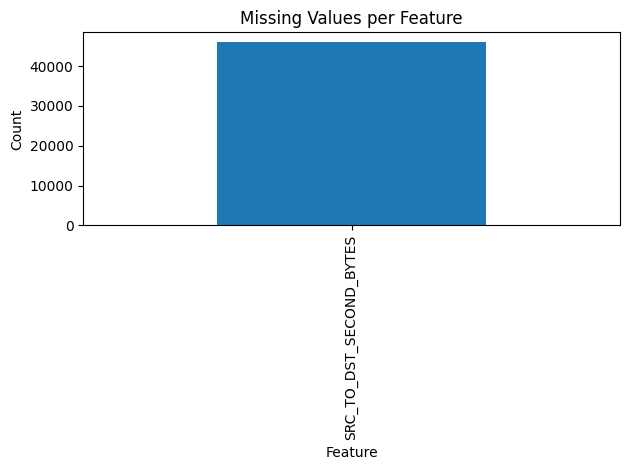

In [18]:
import matplotlib.pyplot as plt

plt.figure()
missing_counts.plot(kind='bar')
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
class_counts = df_copy['Label'].value_counts().sort_index()
class_counts

Label
0    955065
1     93510
Name: count, dtype: int64

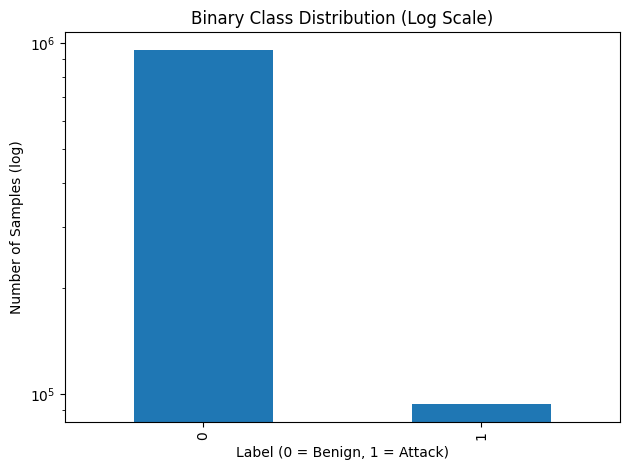

In [20]:
plt.figure()
class_counts.plot(kind='bar', logy=True)
plt.title("Binary Class Distribution (Log Scale)")
plt.xlabel("Label (0 = Benign, 1 = Attack)")
plt.ylabel("Number of Samples (log)")
plt.tight_layout()
plt.show()

In [21]:
(class_counts / class_counts.sum() * 100).round(2)

Label
0    91.08
1     8.92
Name: count, dtype: float64

In [22]:
LEAKAGE_FEATURES = [
    'IPV4_SRC_ADDR',
    'IPV4_DST_ADDR',
    'FLOW_START_MILLISECONDS',
    'FLOW_END_MILLISECONDS',
    'Attack'
]

In [23]:
[col for col in LEAKAGE_FEATURES if col in df.columns]

['IPV4_SRC_ADDR',
 'IPV4_DST_ADDR',
 'FLOW_START_MILLISECONDS',
 'FLOW_END_MILLISECONDS',
 'Attack']

In [24]:
df_pruned = df_copy.drop(columns=LEAKAGE_FEATURES)

In [25]:
print("Shape before pruning:", df_copy.shape)
print("Shape after pruning :", df_pruned.shape)

Shape before pruning: (1048575, 55)
Shape after pruning : (1048575, 50)


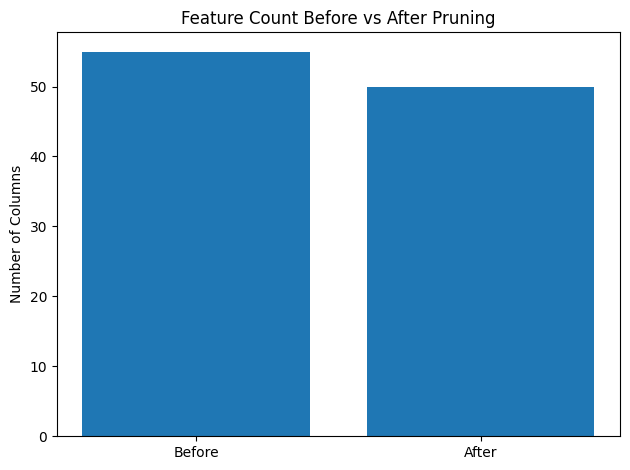

In [26]:
plt.figure()
plt.bar(['Before', 'After'], [df_copy.shape[1], df_pruned.shape[1]])
plt.title("Feature Count Before vs After Pruning")
plt.ylabel("Number of Columns")
plt.tight_layout()
plt.show()

In [27]:
df_pruned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 50 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   L4_SRC_PORT                  1048575 non-null  int64  
 1   L4_DST_PORT                  1048575 non-null  int64  
 2   PROTOCOL                     1048575 non-null  int64  
 3   L7_PROTO                     1048575 non-null  float64
 4   IN_BYTES                     1048575 non-null  int64  
 5   IN_PKTS                      1048575 non-null  int64  
 6   OUT_BYTES                    1048575 non-null  int64  
 7   OUT_PKTS                     1048575 non-null  int64  
 8   TCP_FLAGS                    1048575 non-null  int64  
 9   CLIENT_TCP_FLAGS             1048575 non-null  int64  
 10  SERVER_TCP_FLAGS             1048575 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS   1048575 non-null  int64  
 12  DURATION_IN                  1048575 non-n

In [28]:
df_pruned.isna().sum().sort_values(ascending=False).head(10)

SRC_TO_DST_SECOND_BYTES    46164
L4_SRC_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
dtype: int64

In [29]:
# df_pruned['SRC_TO_DST_SECOND_BYTES'] = (
#     df_pruned['SRC_TO_DST_SECOND_BYTES']
#     .fillna(0)
# )

In [30]:
df_pruned.isna().sum().max()

46164

In [31]:
df_pruned['SRC_TO_DST_SECOND_BYTES'].head()

0     89.000000
1      8.883582
2    222.852033
3    178.000000
4    162.000000
Name: SRC_TO_DST_SECOND_BYTES, dtype: float64

In [32]:
before_missing = df_copy.isna().sum()

In [33]:
after_missing = df_pruned.isna().sum()

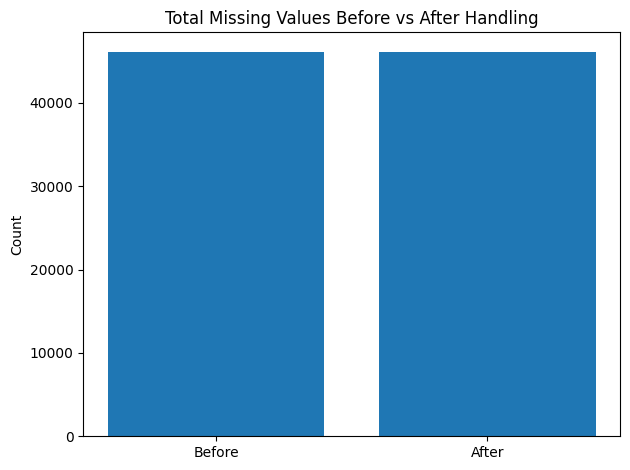

In [34]:
plt.figure()
plt.bar(['Before', 'After'],
        [before_missing.sum(), after_missing.sum()])
plt.title("Total Missing Values Before vs After Handling")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [35]:
print("Final shape:", df_pruned.shape)
df_pruned.info()

Final shape: (1048575, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 50 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   L4_SRC_PORT                  1048575 non-null  int64  
 1   L4_DST_PORT                  1048575 non-null  int64  
 2   PROTOCOL                     1048575 non-null  int64  
 3   L7_PROTO                     1048575 non-null  float64
 4   IN_BYTES                     1048575 non-null  int64  
 5   IN_PKTS                      1048575 non-null  int64  
 6   OUT_BYTES                    1048575 non-null  int64  
 7   OUT_PKTS                     1048575 non-null  int64  
 8   TCP_FLAGS                    1048575 non-null  int64  
 9   CLIENT_TCP_FLAGS             1048575 non-null  int64  
 10  SERVER_TCP_FLAGS             1048575 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS   1048575 non-null  int64  
 12  DURATION_IN    

In [36]:
df_pruned.dropna(inplace=True)

In [37]:
df_pruned['Label'] = df_pruned['Label'].astype(int)

In [38]:
df_benign = df_pruned[df_pruned['Label'] == 0]
df_attack = df_pruned[df_pruned['Label'] == 1]

print("Benign samples:", len(df_benign))
print("Attack samples:", len(df_attack))

Benign samples: 935055
Attack samples: 67356


In [39]:
size_features = [
    'IN_BYTES', 'OUT_BYTES',
    'IN_PKTS', 'OUT_PKTS',
    'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT'
]

time_features = [
    'FLOW_DURATION_MILLISECONDS',
    'DURATION_IN', 'DURATION_OUT'
]

iat_features = [
    'SRC_TO_DST_IAT_MIN', 'SRC_TO_DST_IAT_MAX',
    'SRC_TO_DST_IAT_AVG', 'SRC_TO_DST_IAT_STDDEV',
    'DST_TO_SRC_IAT_AVG'
]

In [40]:
import matplotlib.pyplot as plt

def plot_hist(feature, log=True):
    plt.figure()
    plt.hist(df_benign[feature], bins=100, alpha=0.6, label='Benign')
    plt.hist(df_attack[feature], bins=100, alpha=0.6, label='Attack')

    if log:
        plt.yscale('log')
        plt.xscale('log')

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.tight_layout()
    plt.show()

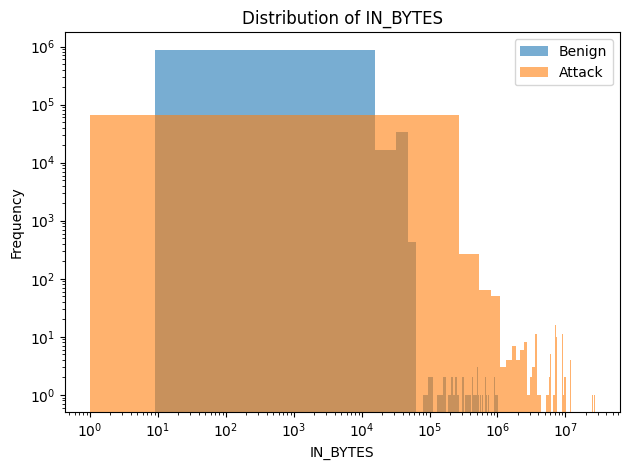

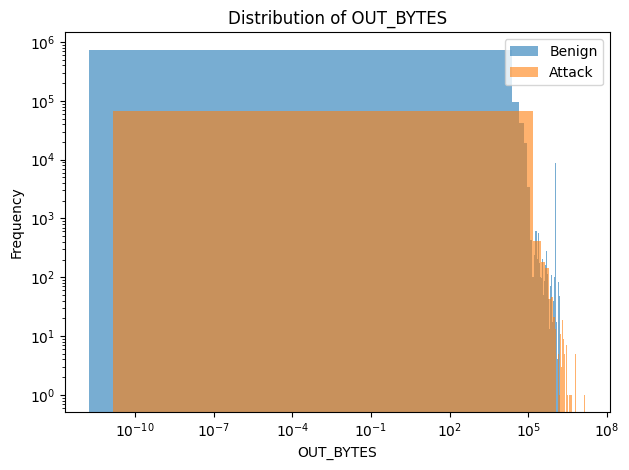

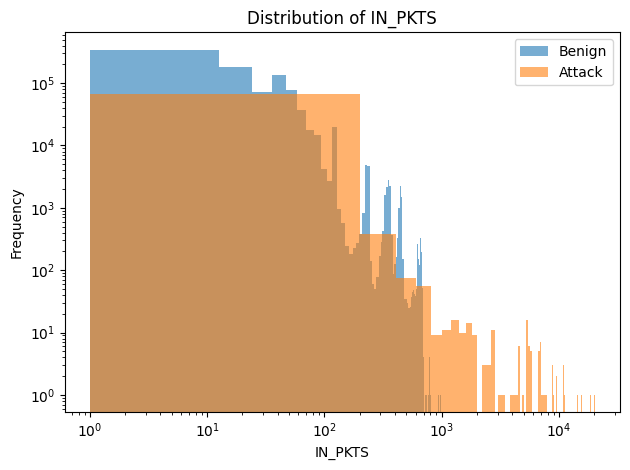

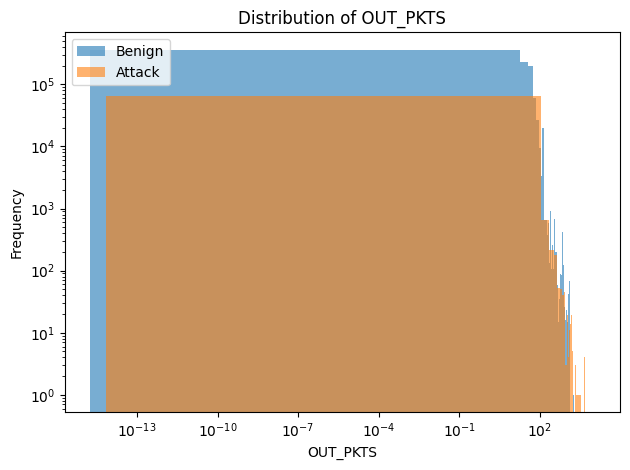

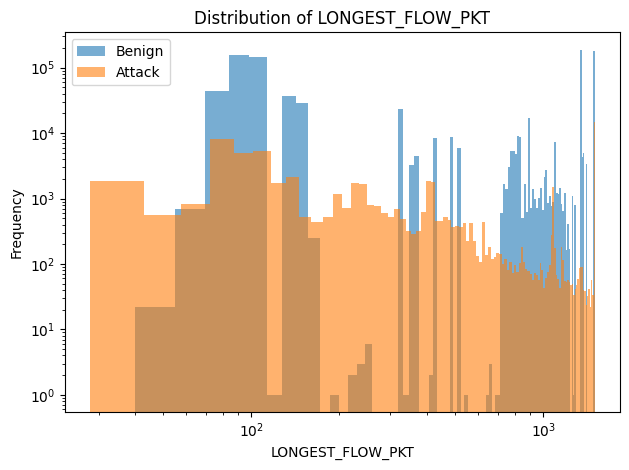

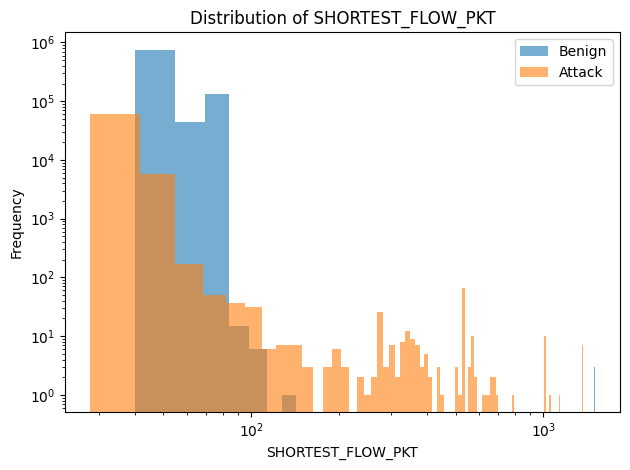

In [41]:
for feat in size_features:
    plot_hist(feat)

In [42]:
def plot_box(feature):
    plt.figure()
    plt.boxplot(
        [df_benign[feature], df_attack[feature]],
        labels=['Benign', 'Attack'],
        showfliers=False
    )
    plt.yscale('log')
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


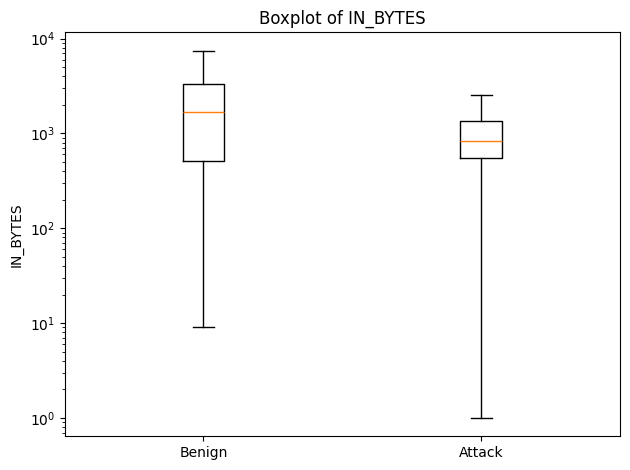

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


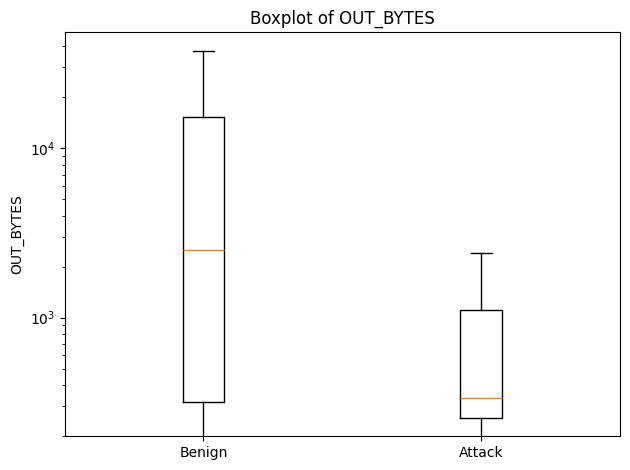

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


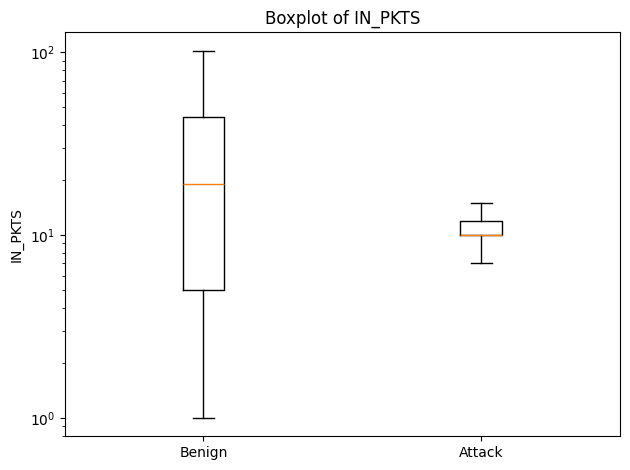

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


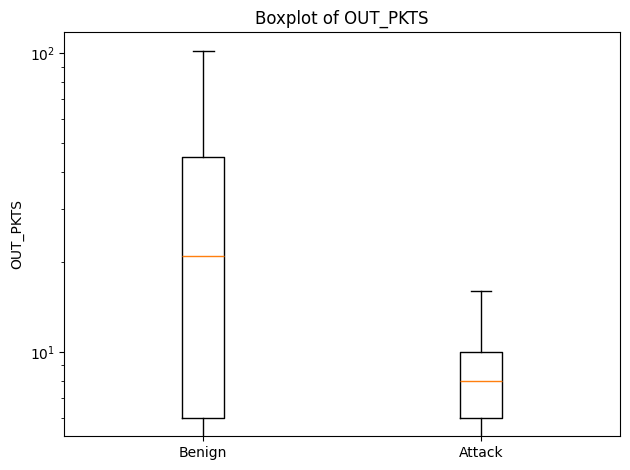

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


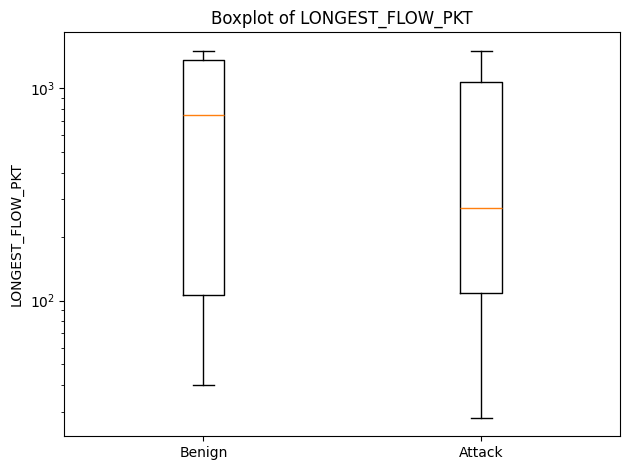

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


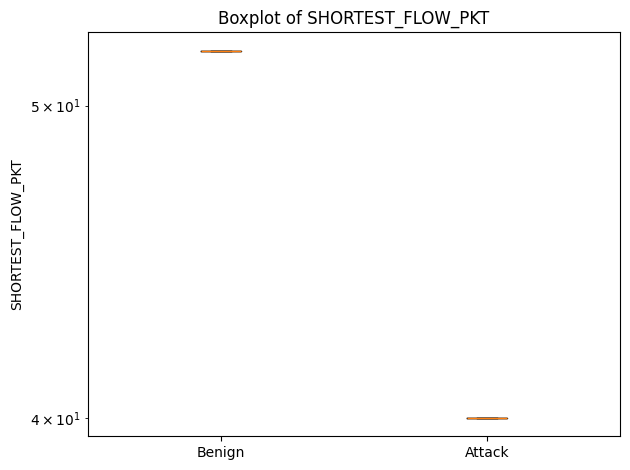

In [43]:
for feat in size_features:
    plot_box(feat)


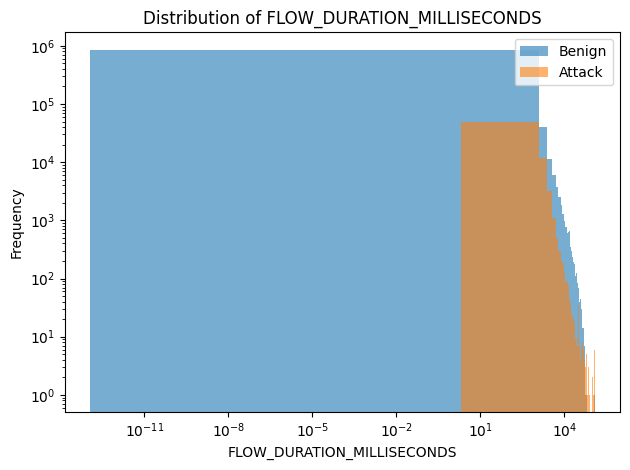

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


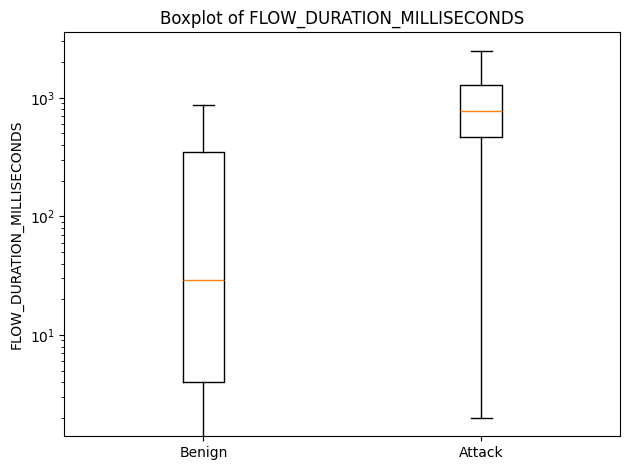

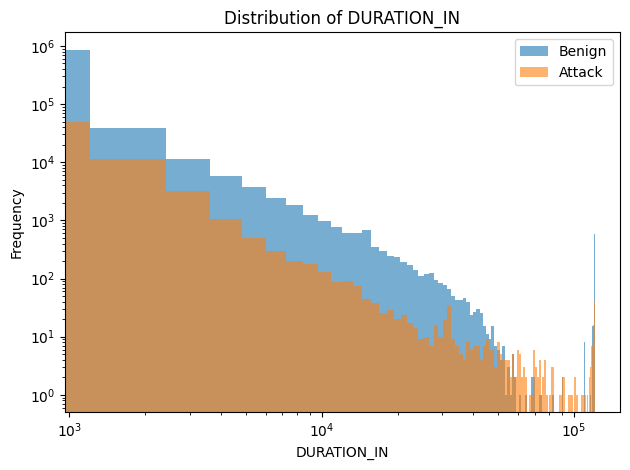

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


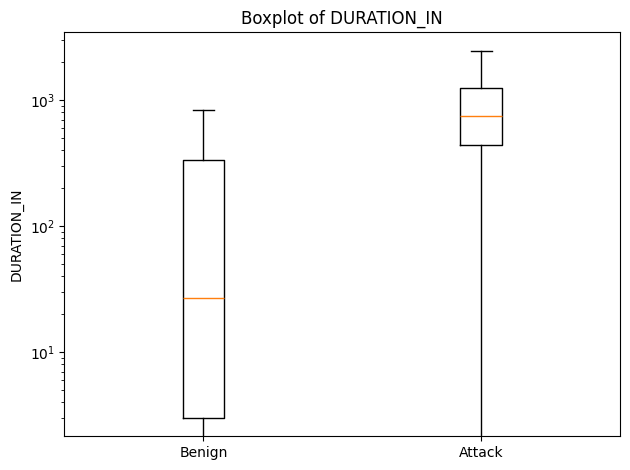

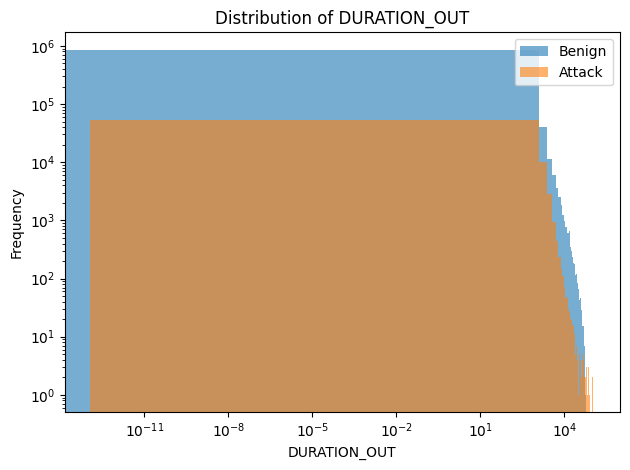

/tmp/ipython-input-1197410059.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


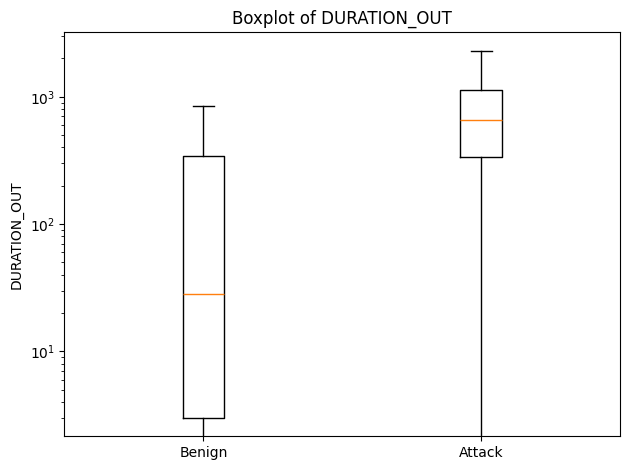

In [44]:
for feat in time_features:
    plot_hist(feat)
    plot_box(feat)

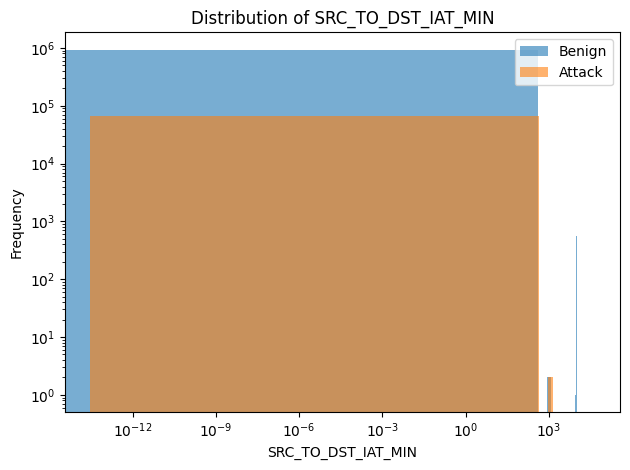

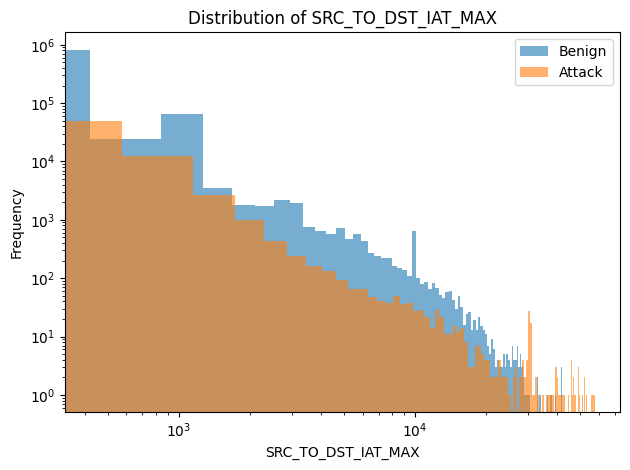

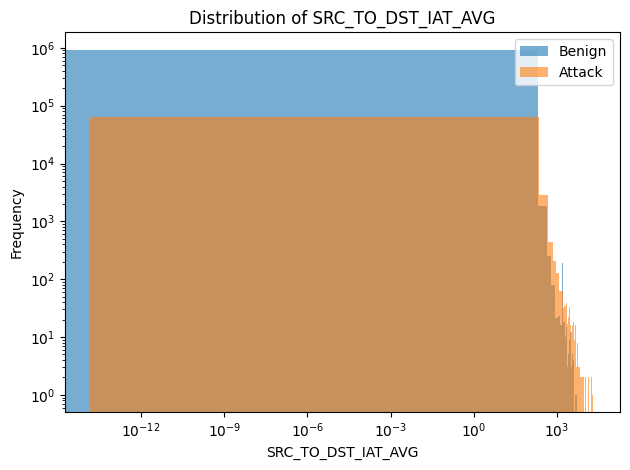

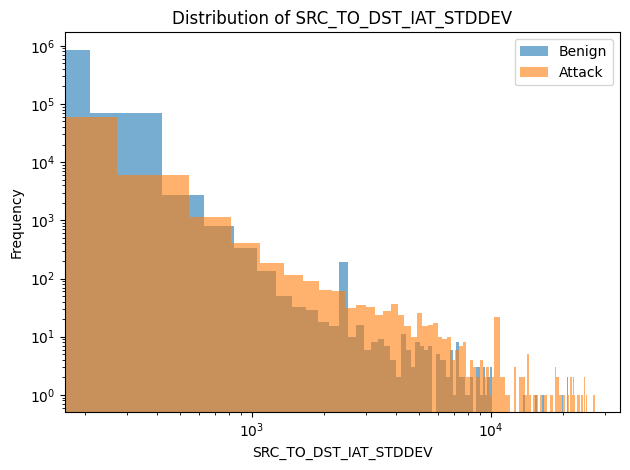

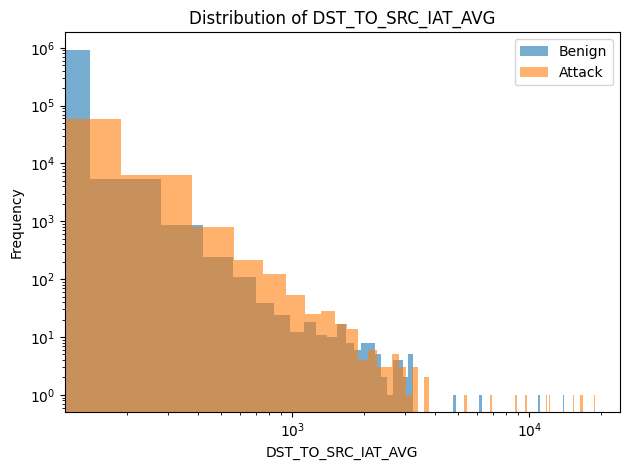

In [45]:
for feat in iat_features:
    plot_hist(feat)

In [46]:
summary = []

for feat in size_features + time_features + iat_features:
    summary.append({
        'feature': feat,
        'benign_mean': df_benign[feat].mean(),
        'attack_mean': df_attack[feat].mean(),
        'benign_median': df_benign[feat].median(),
        'attack_median': df_attack[feat].median()
    })

summary_df = pd.DataFrame(summary)
summary_df

feature   benign_mean   attack_mean  benign_median  \
0                     IN_BYTES   3858.142902  20634.625304         1684.0   
1                    OUT_BYTES  36888.075843  14741.560188         2512.0   
2                      IN_PKTS     36.957596     27.120405           19.0   
3                     OUT_PKTS     47.593714     21.039818           21.0   
4             LONGEST_FLOW_PKT    733.949794    561.157209          748.0   
5            SHORTEST_FLOW_PKT     55.781449     42.271973           52.0   
6   FLOW_DURATION_MILLISECONDS    566.101101   1507.455802           29.0   
7                  DURATION_IN    559.383556   1475.172383           27.0   
8                 DURATION_OUT    486.195029   1168.176673           28.0   
9           SRC_TO_DST_IAT_MIN      6.133168      0.708445            0.0   
10          SRC_TO_DST_IAT_MAX    211.582881    634.839866            5.0   
11          SRC_TO_DST_IAT_AVG     20.889599    125.599561            0.0   
12       SRC_TO_DST_IAT_STDDEV     39.804017    205.377902            1.0   
13          DST_TO_SRC_IAT_AVG     13.152926    109.528431            0.0   

    attack_median  
0           828.0  
1           336.0  
2            10.0  
3             8.0  
4           272.0  
5            40.0  
6           768.0  
7           746.0  
8           653.0  
9             0.0  
10          352.0  
11           73.0  
12          111.0  
13           88.0

In [47]:
features = df_pruned.drop(columns=['Label'])

In [48]:
corr = df_pruned.corr()

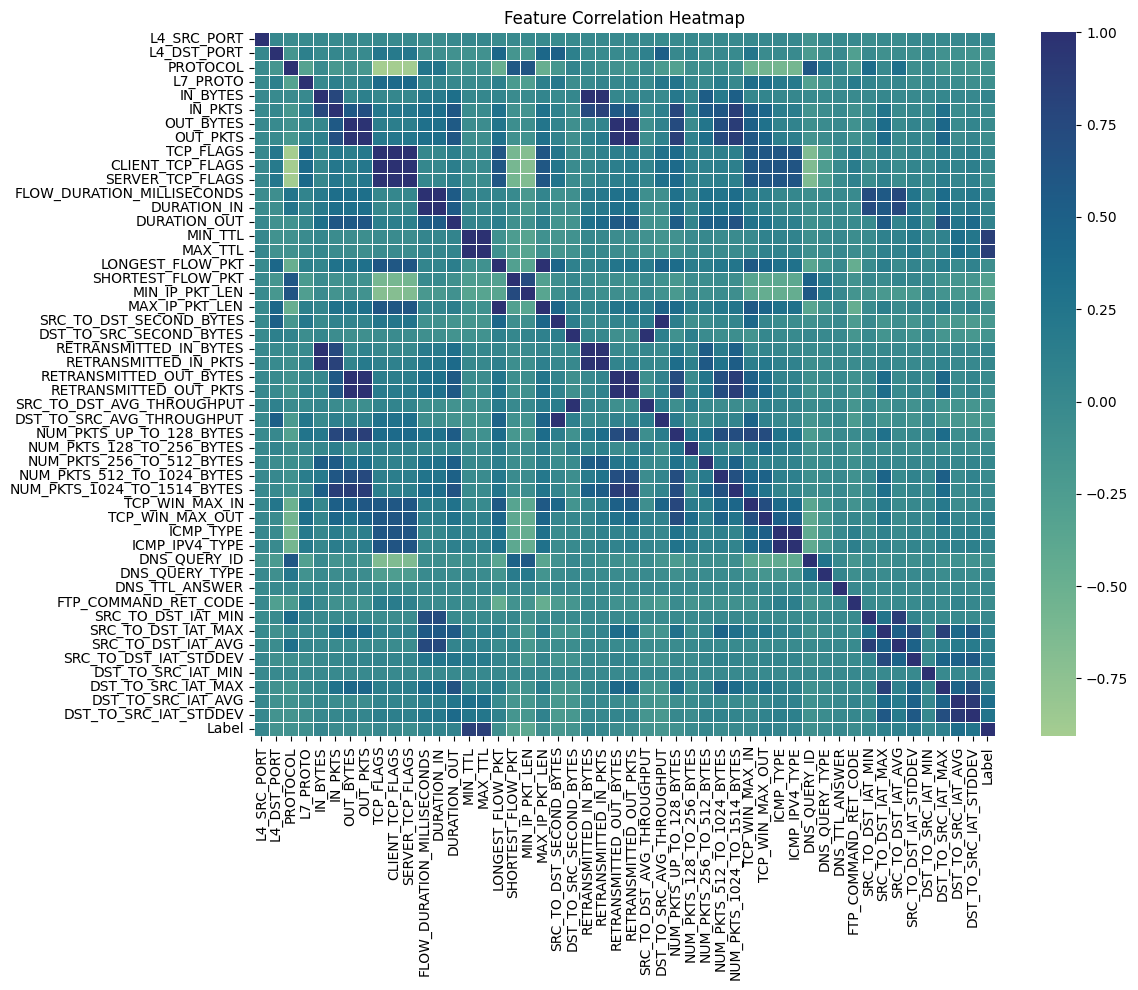

In [49]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, linewidth=.5, cmap="crest")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [50]:
corr_pairs = (
    corr.abs()
    .unstack()
    .sort_values(ascending=False)
)

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]

corr_pairs.head(10)

ICMP_TYPE                   ICMP_IPV4_TYPE                1.000000
ICMP_IPV4_TYPE              ICMP_TYPE                     1.000000
OUT_BYTES                   RETRANSMITTED_OUT_BYTES       0.999979
RETRANSMITTED_OUT_BYTES     OUT_BYTES                     0.999979
MAX_TTL                     MIN_TTL                       0.999901
MIN_TTL                     MAX_TTL                       0.999901
DURATION_IN                 FLOW_DURATION_MILLISECONDS    0.999581
FLOW_DURATION_MILLISECONDS  DURATION_IN                   0.999581
IN_BYTES                    RETRANSMITTED_IN_BYTES        0.999534
RETRANSMITTED_IN_BYTES      IN_BYTES                      0.999534
dtype: float64

In [51]:
def scatter_plot(x, y):
    plt.figure()
    plt.scatter(
        df_benign[x], df_benign[y],
        alpha=0.3, label='Benign', s=10
    )
    plt.scatter(
        df_attack[x], df_attack[y],
        alpha=0.3, label='Attack', s=10
    )
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    plt.legend()
    plt.tight_layout()
    plt.show()

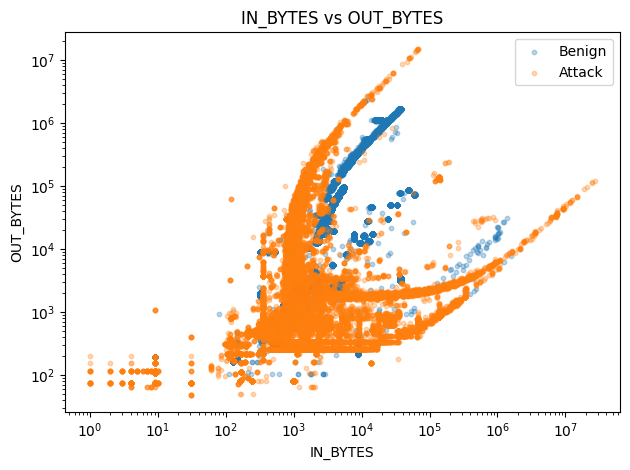

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


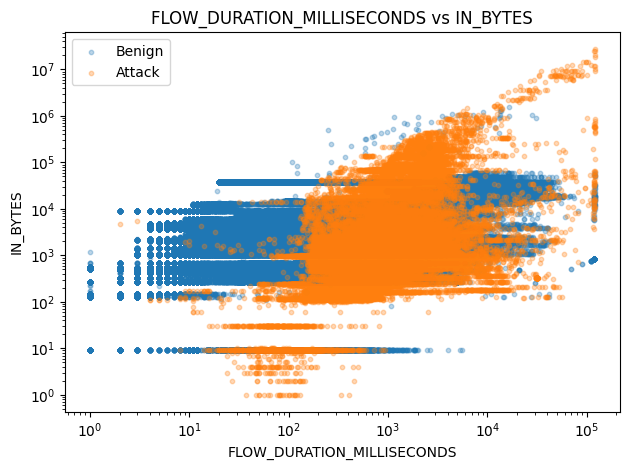

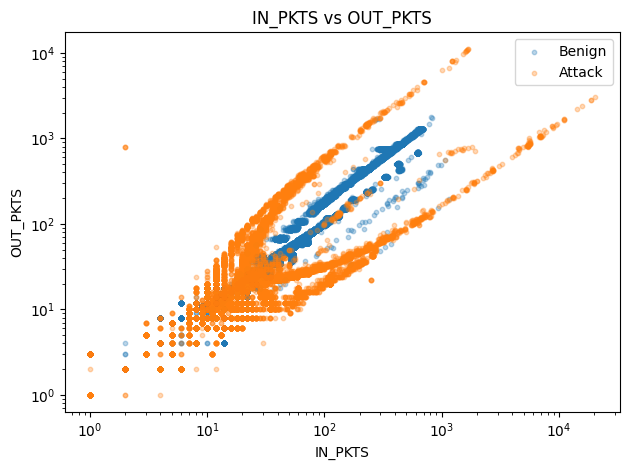

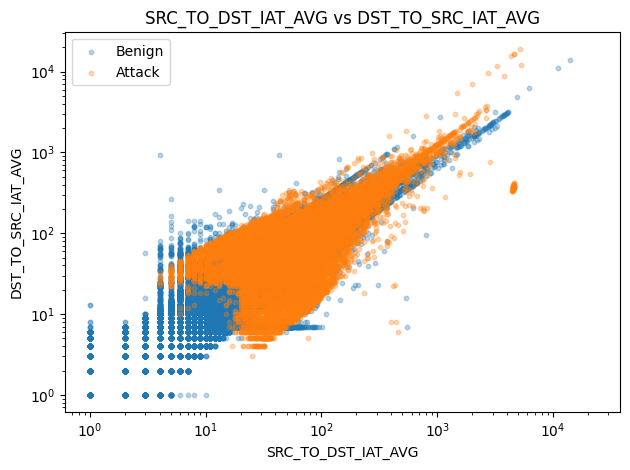

In [52]:
scatter_plot('IN_BYTES', 'OUT_BYTES')
scatter_plot('FLOW_DURATION_MILLISECONDS', 'IN_BYTES')
scatter_plot('IN_PKTS', 'OUT_PKTS')
scatter_plot('SRC_TO_DST_IAT_AVG', 'DST_TO_SRC_IAT_AVG')

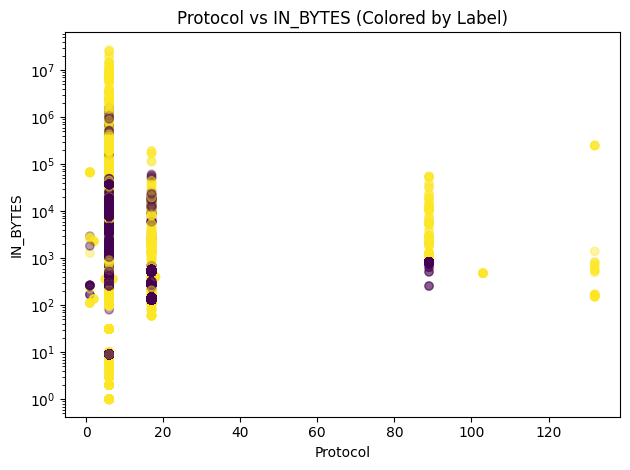

In [53]:
plt.figure()
plt.scatter(
    df_pruned['PROTOCOL'],
    df_pruned['IN_BYTES'],
    c=df_pruned['Label'],
    alpha=0.4
)
plt.yscale('log')
plt.xlabel("Protocol")
plt.ylabel("IN_BYTES")
plt.title("Protocol vs IN_BYTES (Colored by Label)")
plt.tight_layout()
plt.show()

In [54]:
pair_features = [
    'IN_BYTES',
    'OUT_BYTES',
    'FLOW_DURATION_MILLISECONDS',
    'IN_PKTS',
    'SRC_TO_DST_IAT_AVG',
    'Label'
]

sample_df = df_pruned[pair_features].sample(3000, random_state=42)

<Figure size 640x480 with 0 Axes>

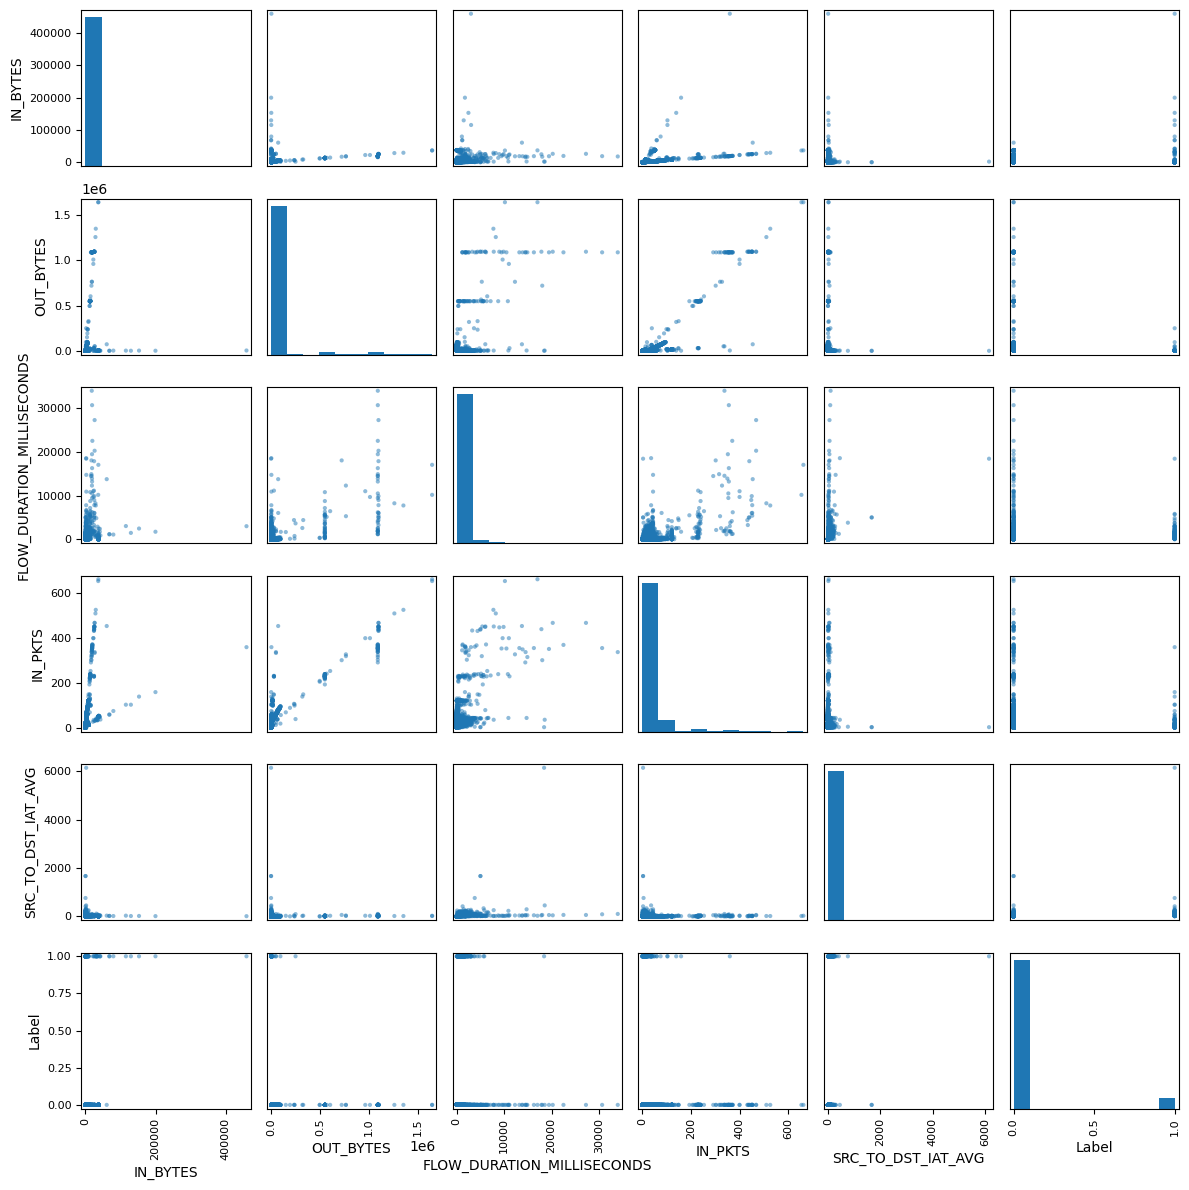

In [55]:
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(
    sample_df,
    alpha=0.5,
    figsize=(12, 12),
    diagonal='hist'
)
plt.tight_layout()
plt.show()

In [56]:
df_fe = df_pruned.copy()

In [57]:
df_fe['TOTAL_BYTES'] = df_fe['IN_BYTES'] + df_fe['OUT_BYTES']

In [58]:
df_fe['TOTAL_PKTS'] = df_fe['IN_PKTS'] + df_fe['OUT_PKTS']

In [59]:
df_fe['BYTES_PER_PKT'] = (
    df_fe['TOTAL_BYTES'] / (df_fe['TOTAL_PKTS'] + 1)
)

In [60]:
df_fe['PKTS_PER_SECOND'] = (
    df_fe['TOTAL_PKTS'] /
    (df_fe['FLOW_DURATION_MILLISECONDS'] / 1000 + 1)
)

In [61]:
df_fe['BYTE_RATIO'] = (
    df_fe['IN_BYTES'] / (df_fe['OUT_BYTES'] + 1)
)

In [62]:
df_fe['PKT_RATIO'] = (
    df_fe['IN_PKTS'] / (df_fe['OUT_PKTS'] + 1)
)

In [63]:
df_fe.replace([np.inf, -np.inf], 0, inplace=True)

In [64]:
new_features = [
    'TOTAL_BYTES', 'TOTAL_PKTS',
    'BYTES_PER_PKT', 'PKTS_PER_SECOND',
    'BYTE_RATIO', 'PKT_RATIO'
]

df_fe[new_features].describe()

TOTAL_BYTES    TOTAL_PKTS  BYTES_PER_PKT  PKTS_PER_SECOND  \
count  1.002411e+06  1.002411e+06   1.002411e+06     1.002411e+06   
mean   4.038538e+04  8.210605e+01   2.114711e+02     4.870819e+01   
std    1.883027e+05  1.963306e+02   1.993369e+02     5.888772e+01   
min    6.700000e+01  2.000000e+00   2.233333e+01     6.414642e-02   
25%    8.800000e+02  1.200000e+01   6.311236e+01     8.044243e+00   
50%    4.875000e+03  3.600000e+01   9.777778e+01     2.700556e+01   
75%    2.340000e+04  9.000000e+01   3.591515e+02     7.699901e+01   
max    2.714195e+07  2.318000e+04   1.284857e+03     5.353455e+02   

         BYTE_RATIO     PKT_RATIO  
count  1.002411e+06  1.002411e+06  
mean   6.513271e+00  9.181890e-01  
std    3.440600e+02  2.927528e+00  
min    1.973652e-03  2.496879e-03  
25%    1.273839e-01  6.666667e-01  
50%    7.133676e-01  8.823529e-01  
75%    8.479861e-01  9.473684e-01  
max    6.679200e+04  9.320000e+02

In [65]:
df_benign_fe = df_fe[df_fe['Label'] == 0]
df_attack_fe = df_fe[df_fe['Label'] == 1]

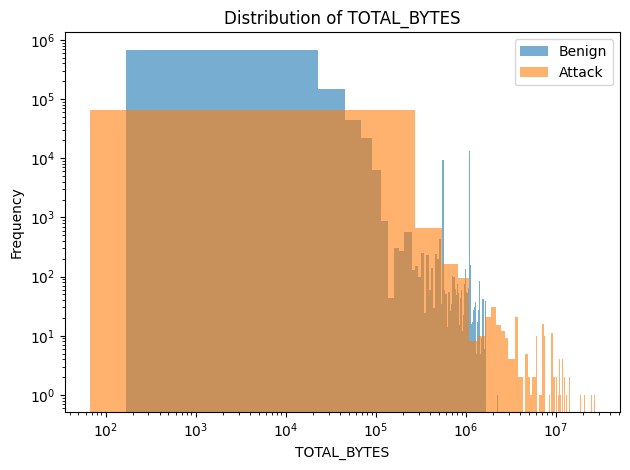

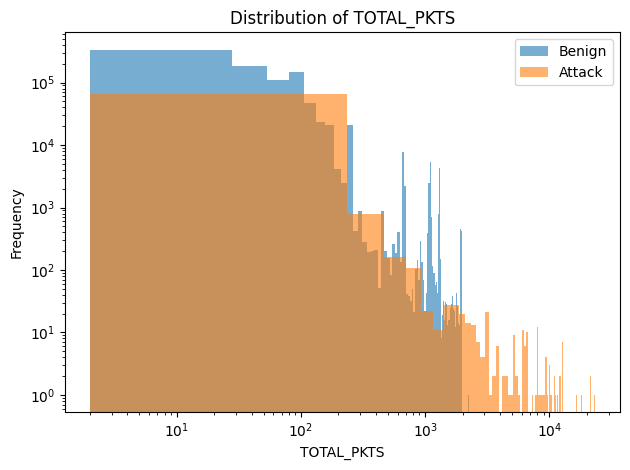

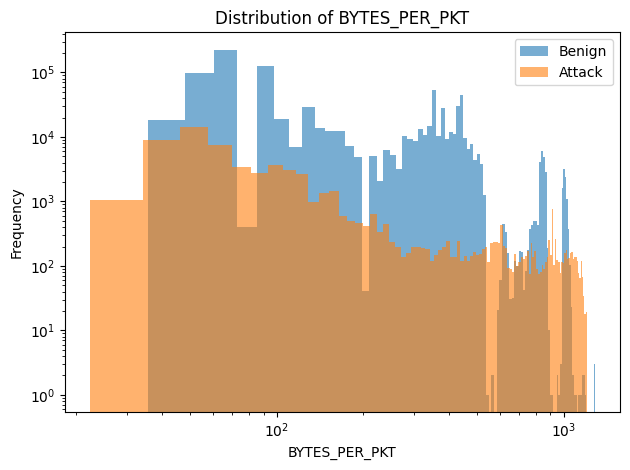

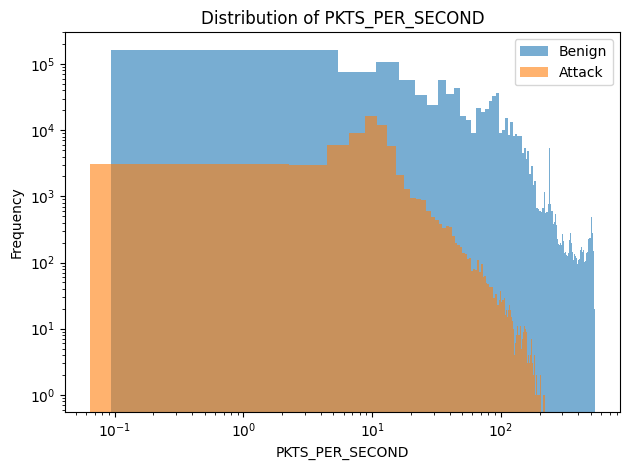

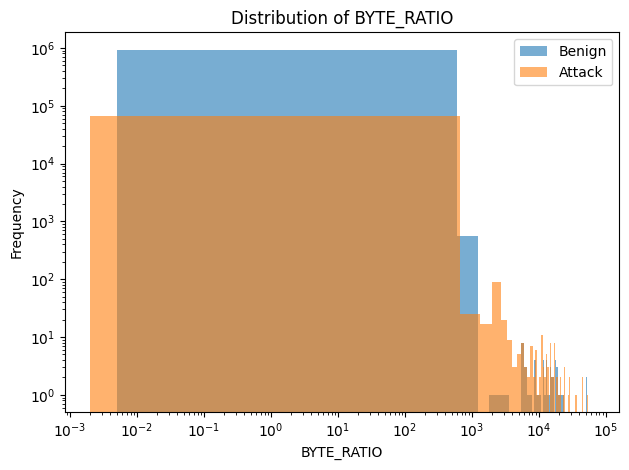

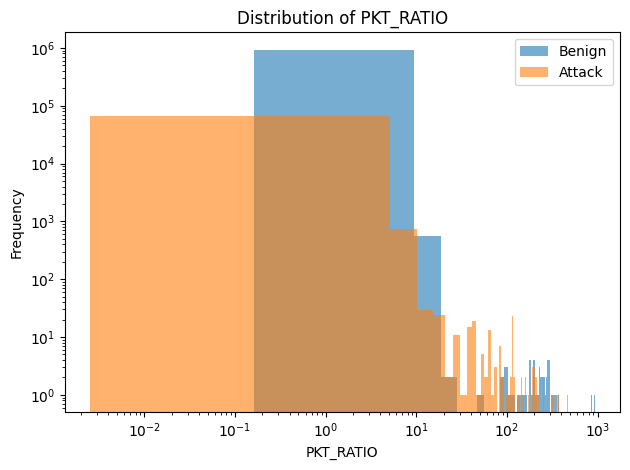

In [66]:
def plot_hist(feature, log=True):
  plt.figure()
  plt.hist(df_benign_fe[feature], bins=100, alpha=0.6, label='Benign')
  plt.hist(df_attack_fe[feature], bins=100, alpha=0.6, label='Attack')

  if log:
    plt.yscale('log')
    plt.xscale('log')

  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {feature}")
  plt.legend()
  plt.tight_layout()
  plt.show()
for feat in new_features:
  plot_hist(feat)

In [67]:
corr_fe = df_fe[new_features + ['Label']].corr()
corr_fe

TOTAL_BYTES  TOTAL_PKTS  BYTES_PER_PKT  PKTS_PER_SECOND  \
TOTAL_BYTES         1.000000    0.959485       0.566177         0.459156   
TOTAL_PKTS          0.959485    1.000000       0.582863         0.585572   
BYTES_PER_PKT       0.566177    0.582863       1.000000         0.613121   
PKTS_PER_SECOND     0.459156    0.585572       0.613121         1.000000   
BYTE_RATIO          0.001561    0.006783       0.011367        -0.010209   
PKT_RATIO          -0.006414    0.006474       0.012829        -0.003828   
Label              -0.007140   -0.046405      -0.024961        -0.159645   

                 BYTE_RATIO  PKT_RATIO     Label  
TOTAL_BYTES        0.001561  -0.006414 -0.007140  
TOTAL_PKTS         0.006783   0.006474 -0.046405  
BYTES_PER_PKT      0.011367   0.012829 -0.024961  
PKTS_PER_SECOND   -0.010209  -0.003828 -0.159645  
BYTE_RATIO         1.000000   0.717067  0.036924  
PKT_RATIO          0.717067   1.000000  0.059023  
Label              0.036924   0.059023  1.000000

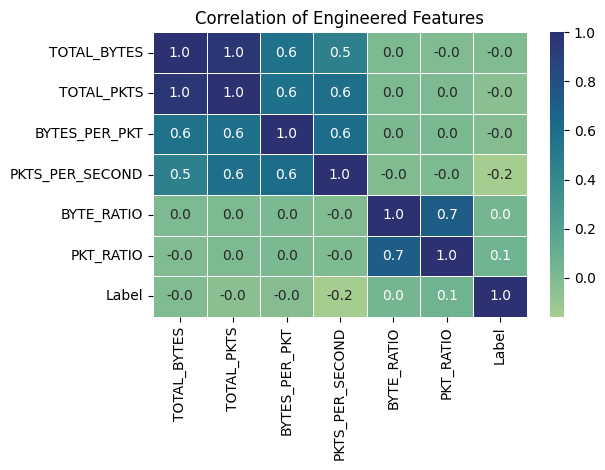

In [68]:
plt.figure()
sns.heatmap(corr_fe, annot=True, fmt = '.1f', linewidth=.5, cmap="crest")
plt.title("Correlation of Engineered Features")
plt.tight_layout()
plt.show()

In [69]:
print("Before FE:", df_pruned.shape)
print("After FE :", df_fe.shape)

Before FE: (1002411, 50)
After FE : (1002411, 56)


In [70]:
X = df_fe.drop(columns=['Label'])
y = df_fe['Label']

In [71]:
X.shape, y.shape

((1002411, 55), (1002411,))

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

In [73]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

In [74]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (701687, 55)
Validation: (150362, 55)
Test: (150362, 55)


In [75]:
split_df = pd.DataFrame({
    'Train': y_train.value_counts(normalize=True),
    'Validation': y_val.value_counts(normalize=True),
    'Test': y_test.value_counts(normalize=True)
})

split_df

Train  Validation      Test
Label                                
0      0.932806    0.932802  0.932809
1      0.067194    0.067198  0.067191

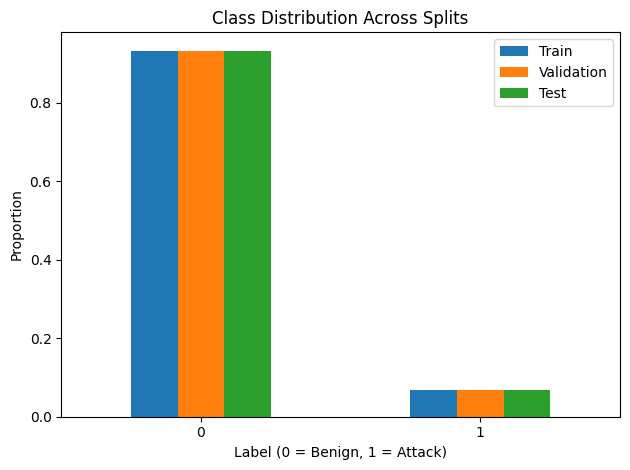

In [76]:
split_df.plot(kind='bar')
plt.title("Class Distribution Across Splits")
plt.ylabel("Proportion")
plt.xlabel("Label (0 = Benign, 1 = Attack)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [77]:
X_train.to_parquet("X_train.parquet")
X_val.to_parquet("X_val.parquet")
X_test.to_parquet("X_test.parquet")

y_train.to_frame().to_parquet("y_train.parquet")
y_val.to_frame().to_parquet("y_val.parquet")
y_test.to_frame().to_parquet("y_test.parquet")

In [78]:
numeric_features = X_train.columns.tolist()
len(numeric_features)

55

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [80]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [81]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=numeric_features,
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    X_val_scaled,
    columns=numeric_features,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=numeric_features,
    index=X_test.index
)

In [82]:
check_features = [
    'IN_BYTES',
    'FLOW_DURATION_MILLISECONDS',
    'BYTES_PER_PKT',
    'PKTS_PER_SECOND'
]

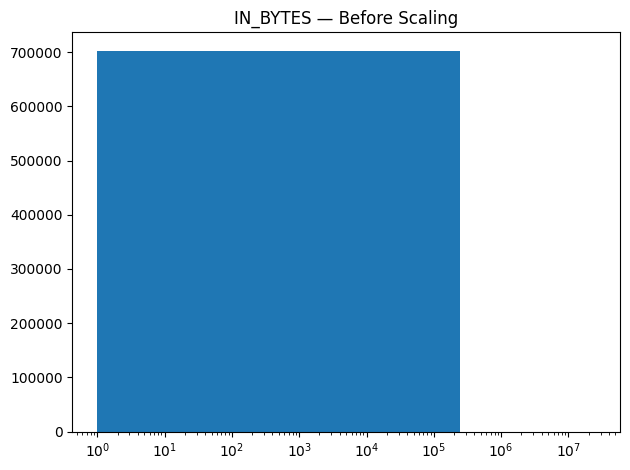

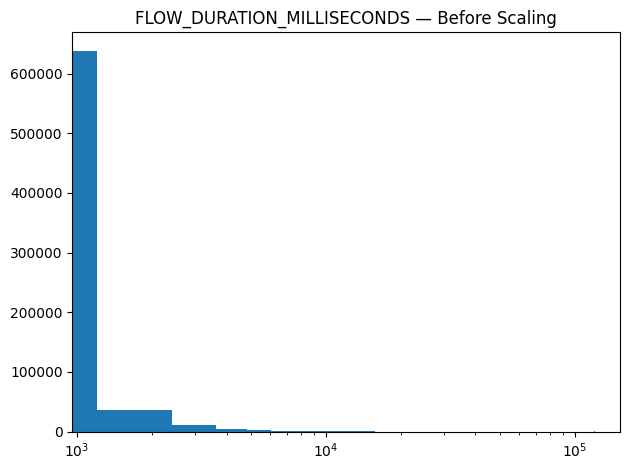

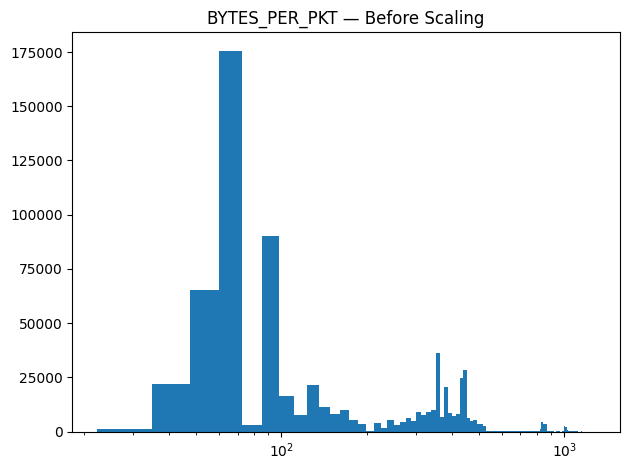

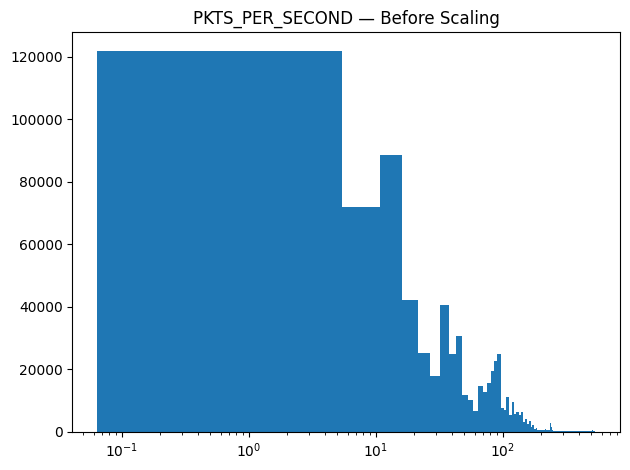

In [83]:
for feat in check_features:
    plt.figure()
    plt.hist(X_train[feat], bins=100)
    plt.xscale('log')
    plt.title(f"{feat} — Before Scaling")
    plt.tight_layout()
    plt.show()

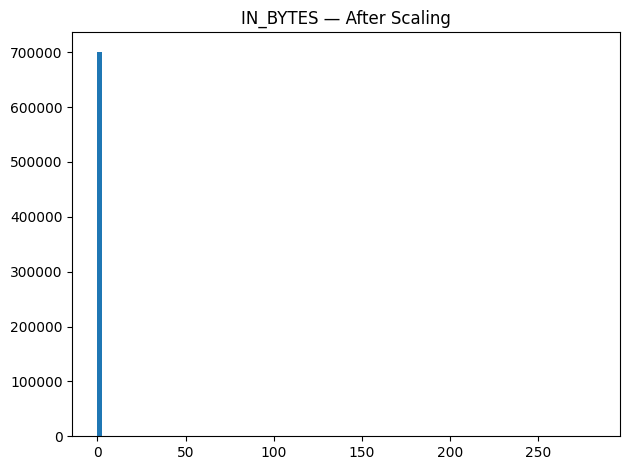

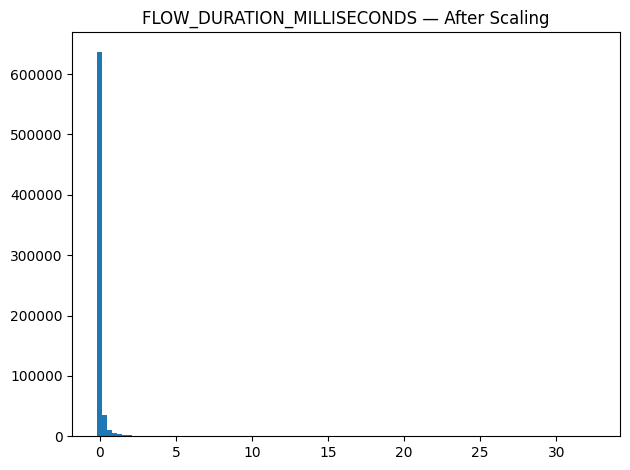

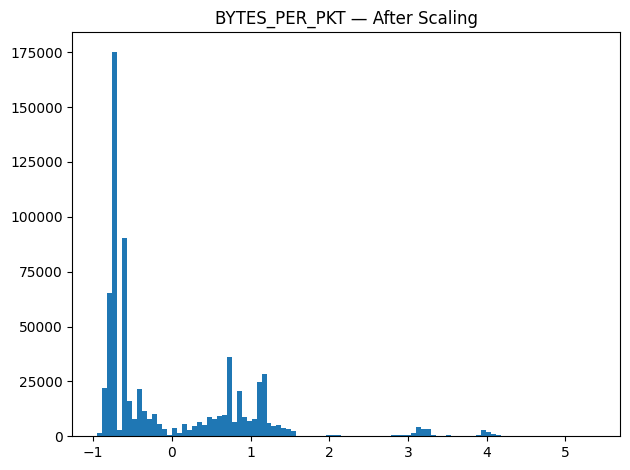

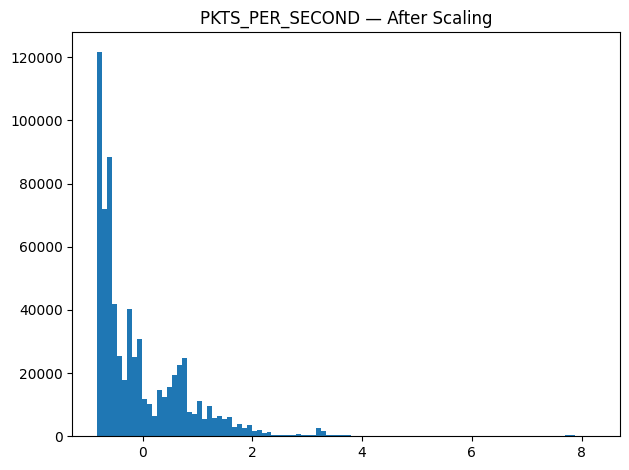

In [84]:
for feat in check_features:
    plt.figure()
    plt.hist(X_train_scaled[feat], bins=100)
    plt.title(f"{feat} — After Scaling")
    plt.tight_layout()
    plt.show()

In [85]:
X_train_scaled.describe().loc[['mean', 'std']]

L4_SRC_PORT   L4_DST_PORT      PROTOCOL      L7_PROTO      IN_BYTES  \
mean  9.475091e-17 -4.188199e-17 -7.781990e-17  5.150999e-16  1.093630e-18   
std   1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   

           IN_PKTS     OUT_BYTES      OUT_PKTS     TCP_FLAGS  \
mean -3.213045e-17 -2.239917e-17 -9.397119e-18  5.838771e-17   
std   1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   

      CLIENT_TCP_FLAGS  ...  DST_TO_SRC_IAT_MIN  DST_TO_SRC_IAT_MAX  \
mean     -1.408252e-16  ...       -4.050483e-19       -1.336659e-17   
std       1.000001e+00  ...        1.000001e+00        1.000001e+00   

      DST_TO_SRC_IAT_AVG  DST_TO_SRC_IAT_STDDEV   TOTAL_BYTES    TOTAL_PKTS  \
mean       -7.554150e-18           5.873200e-18  9.457877e-18 -1.215145e-19   
std         1.000001e+00           1.000001e+00  1.000001e+00  1.000001e+00   

      BYTES_PER_PKT  PKTS_PER_SECOND    BYTE_RATIO     PKT_RATIO  
mean  -3.591614e-16    -1.626674e-16  3.999852e-19  8.957642e-17  
std    1.000001e+00     1.000001e+00  1.000001e+00  1.000001e+00  

[2 rows x 55 columns]

In [86]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

def evaluate_model(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_prob)
    }

In [87]:
from sklearn.metrics import roc_curve, precision_recall_curve

def plot_curves(y_true, y_prob, model_name):
    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {model_name}")
    plt.tight_layout()
    plt.show()

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.figure()
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision–Recall Curve — {model_name}")
    plt.tight_layout()
    plt.show()

In [88]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

y_val_prob = log_reg.predict_proba(X_val_scaled)[:, 1]
y_val_pred = (y_val_prob >= 0.5).astype(int)

log_reg_results = evaluate_model(y_val, y_val_pred, y_val_prob)
log_reg_results

{'Accuracy': 0.9999002407523178,
 'Precision': 0.998714780029659,
 'Recall': 0.9998020585906572,
 'F1': 0.9992581235471586,
 'ROC_AUC': np.float64(0.9998742646271588)}

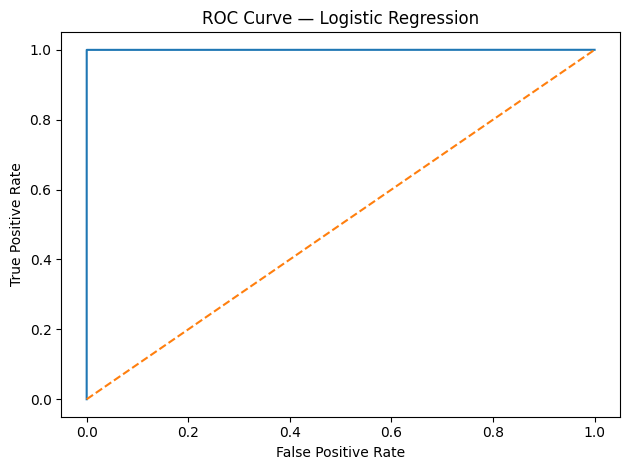

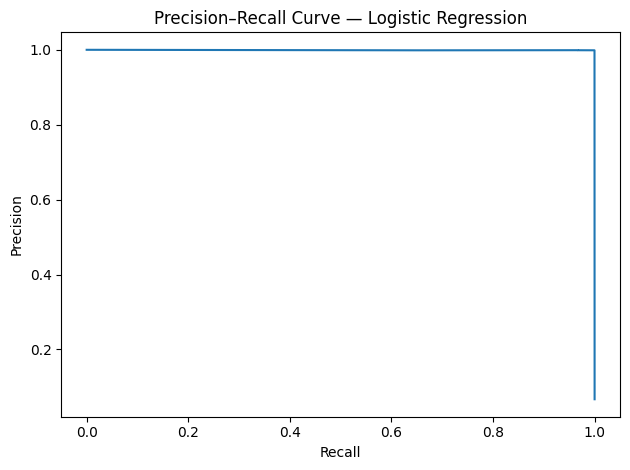

In [89]:
plot_curves(y_val, y_val_prob, "Logistic Regression")

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_val_prob = rf.predict_proba(X_val)[:, 1]
y_val_pred = rf.predict(X_val)

rf_results = evaluate_model(y_val, y_val_pred, y_val_prob)
rf_results

{'Accuracy': 0.9999600963009271,
 'Precision': 0.9995053423031263,
 'Recall': 0.9999010292953285,
 'F1': 0.9997031466455572,
 'ROC_AUC': np.float64(0.9999999922380345)}

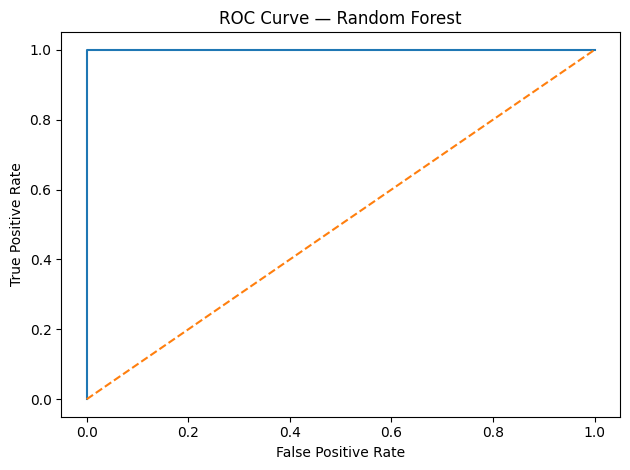

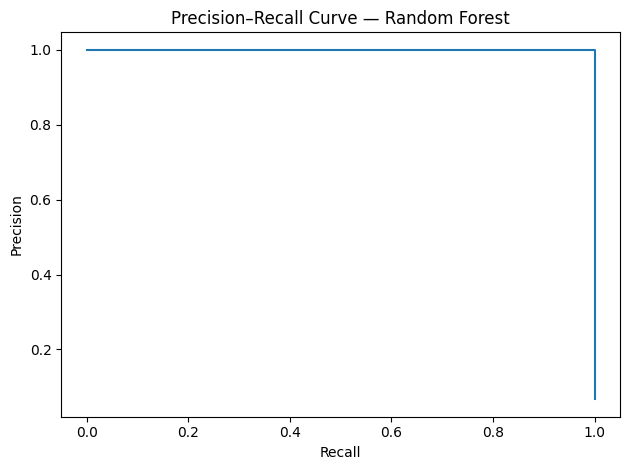

In [91]:
plot_curves(y_val, y_val_prob, "Random Forest")

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

y_val_prob = gb.predict_proba(X_val)[:, 1]
y_val_pred = gb.predict(X_val)

gb_results = evaluate_model(y_val, y_val_pred, y_val_prob)
gb_results

{'Accuracy': 0.9999866987669757,
 'Precision': 0.9999010292953285,
 'Recall': 0.9999010292953285,
 'F1': 0.9999010292953285,
 'ROC_AUC': np.float64(0.9999999774197369)}

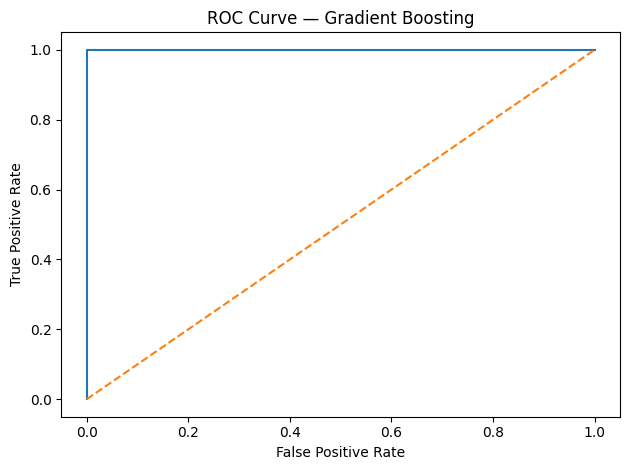

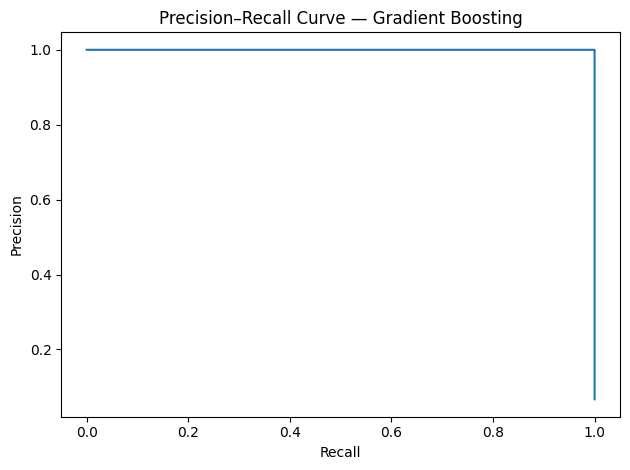

In [93]:
plot_curves(y_val, y_val_prob, "Gradient Boosting")

In [94]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_val_prob = xgb.predict_proba(X_val)[:, 1]
y_val_pred = xgb.predict(X_val)

xgb_results = evaluate_model(y_val, y_val_pred, y_val_prob)
xgb_results

{'Accuracy': 0.9999866987669757,
 'Precision': 0.9999010292953285,
 'Recall': 0.9999010292953285,
 'F1': 0.9999010292953285,
 'ROC_AUC': np.float64(0.9999994764201481)}

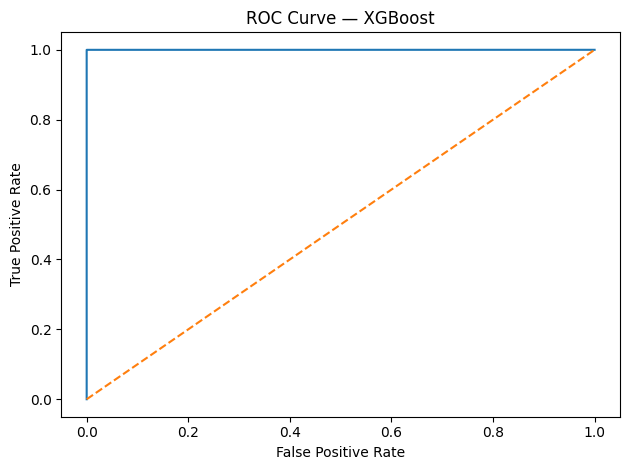

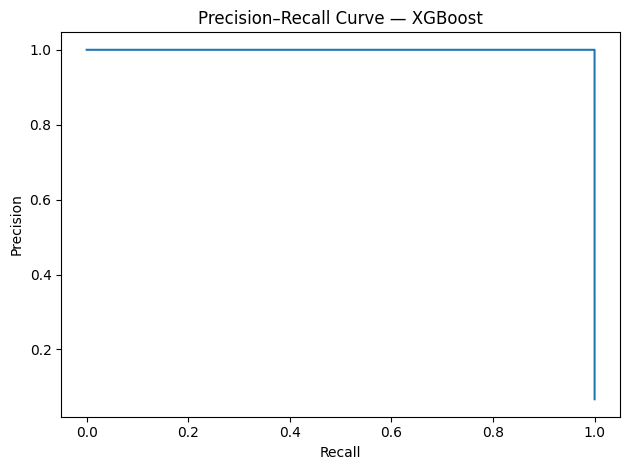

In [95]:
plot_curves(y_val, y_val_prob, "XGBoost")

In [96]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42
)

lgbm.fit(X_train, y_train)

y_val_prob = lgbm.predict_proba(X_val)[:, 1]
y_val_pred = lgbm.predict(X_val)

lgbm_results = evaluate_model(y_val, y_val_pred, y_val_prob)
lgbm_results

[LightGBM] [Info] Number of positive: 47149, number of negative: 654538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.133238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9469
[LightGBM] [Info] Number of data points in the train set: 701687, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

{'Accuracy': 0.9999866987669757,
 'Precision': 0.9999010292953285,
 'Recall': 0.9999010292953285,
 'F1': 0.9999010292953285,
 'ROC_AUC': np.float64(0.9999991158415709)}

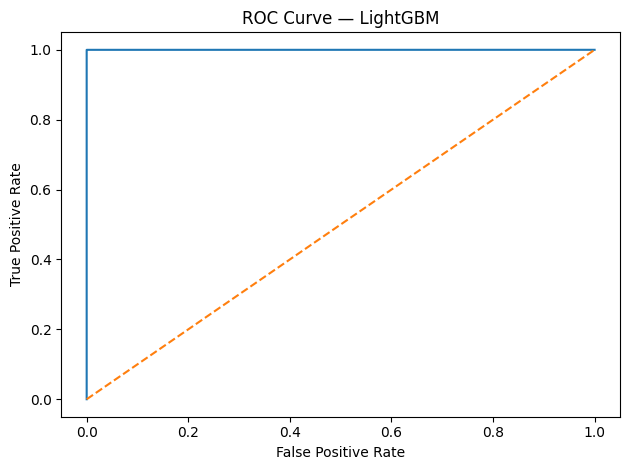

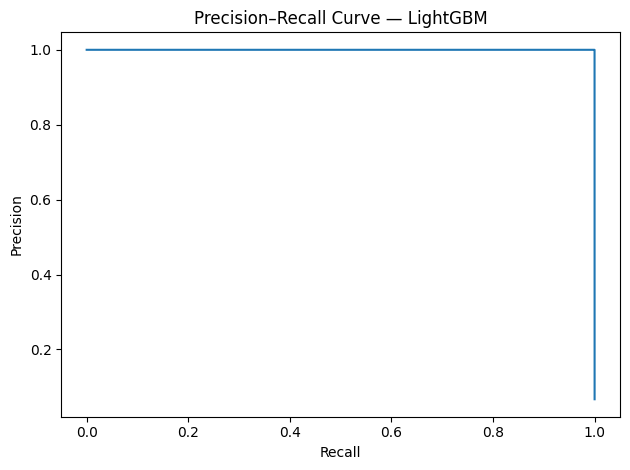

In [97]:
plot_curves(y_val, y_val_prob, "LightGBM")

In [98]:
results_df = pd.DataFrame.from_dict({
    'Logistic Regression': log_reg_results,
    'Random Forest': rf_results,
    'Gradient Boosting': gb_results,
    'XGBoost': xgb_results,
    'LightGBM': lgbm_results
}, orient='index')

results_df.sort_values(by='ROC_AUC', ascending=False)

Accuracy  Precision    Recall        F1   ROC_AUC
Random Forest        0.999960   0.999505  0.999901  0.999703  1.000000
Gradient Boosting    0.999987   0.999901  0.999901  0.999901  1.000000
XGBoost              0.999987   0.999901  0.999901  0.999901  0.999999
LightGBM             0.999987   0.999901  0.999901  0.999901  0.999999
Logistic Regression  0.999900   0.998715  0.999802  0.999258  0.999874

In [99]:
best_model = gb
best_model_name = "Gradient Boosting"

In [100]:
y_test_prob = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= 0.5).astype(int)

In [101]:
from sklearn.metrics import classification_report

test_results = evaluate_model(y_test, y_test_pred, y_test_prob)
test_results

{'Accuracy': 0.9999800481504636,
 'Precision': 0.9997031466455572,
 'Recall': 1.0,
 'F1': 0.9998515512890297,
 'ROC_AUC': np.float64(1.0)}

In [102]:
print(classification_report(
    y_test, y_test_pred,
    target_names=["Benign", "Attack"]
))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    140259
      Attack       1.00      1.00      1.00     10103

    accuracy                           1.00    150362
   macro avg       1.00      1.00      1.00    150362
weighted avg       1.00      1.00      1.00    150362



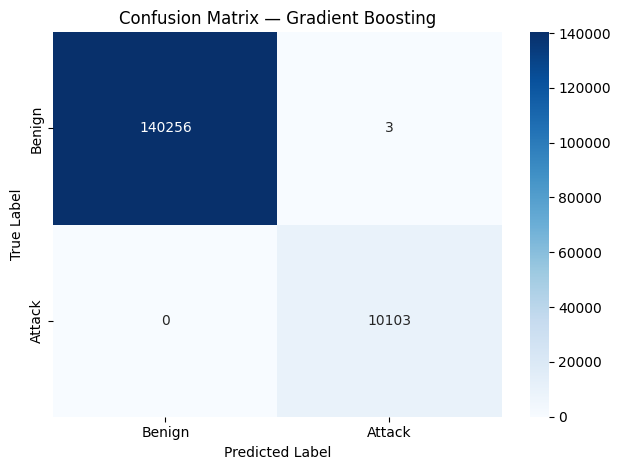

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Attack"],
            yticklabels=["Benign", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix — {best_model_name}")
plt.tight_layout()
plt.show()

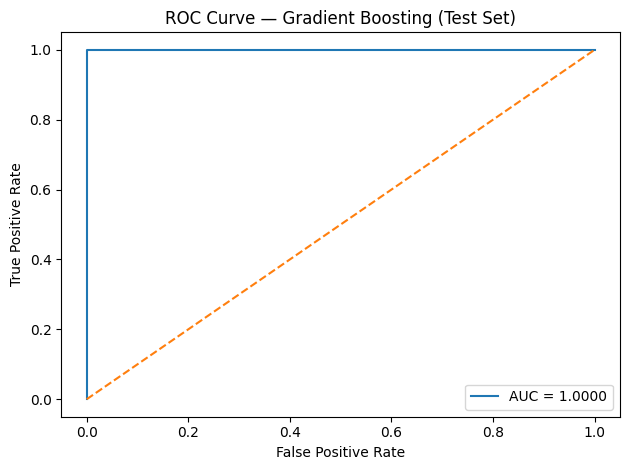

In [104]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve — {best_model_name} (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()

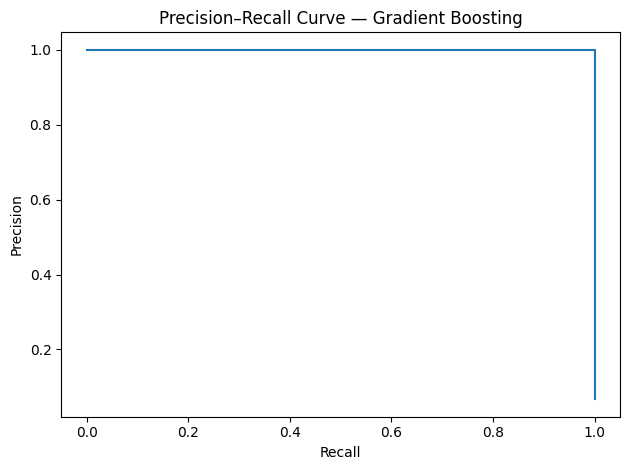

In [105]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve — {best_model_name}")
plt.tight_layout()
plt.show()

In [106]:
thresholds = np.linspace(0.1, 0.9, 9)

rows = []
for t in thresholds:
    preds = (y_test_prob >= t).astype(int)
    rows.append({
        'Threshold': t,
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1': f1_score(y_test, preds)
    })

pd.DataFrame(rows)

Threshold  Precision    Recall        F1
0        0.1   0.999406  1.000000  0.999703
1        0.2   0.999604  1.000000  0.999802
2        0.3   0.999604  1.000000  0.999802
3        0.4   0.999604  1.000000  0.999802
4        0.5   0.999703  1.000000  0.999852
5        0.6   0.999703  1.000000  0.999852
6        0.7   0.999901  1.000000  0.999951
7        0.8   0.999901  1.000000  0.999951
8        0.9   1.000000  0.999901  0.999951

In [107]:
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": best_model.feature_importances_
}).sort_values(by="importance", ascending=False)

In [108]:
top_k = 20
top_features = feature_importance.head(top_k)

top_features

feature  importance
15                    MAX_TTL    0.509111
14                    MIN_TTL    0.486939
38             DNS_QUERY_TYPE    0.001748
17          SHORTEST_FLOW_PKT    0.000467
7                    OUT_PKTS    0.000301
6                   OUT_BYTES    0.000286
20    SRC_TO_DST_SECOND_BYTES    0.000249
52            PKTS_PER_SECOND    0.000212
0                 L4_SRC_PORT    0.000150
12                DURATION_IN    0.000080
44      SRC_TO_DST_IAT_STDDEV    0.000066
9            CLIENT_TCP_FLAGS    0.000051
1                 L4_DST_PORT    0.000050
54                  PKT_RATIO    0.000050
41         SRC_TO_DST_IAT_MIN    0.000041
26  SRC_TO_DST_AVG_THROUGHPUT    0.000038
13               DURATION_OUT    0.000027
8                   TCP_FLAGS    0.000026
53                 BYTE_RATIO    0.000021
48      DST_TO_SRC_IAT_STDDEV    0.000019

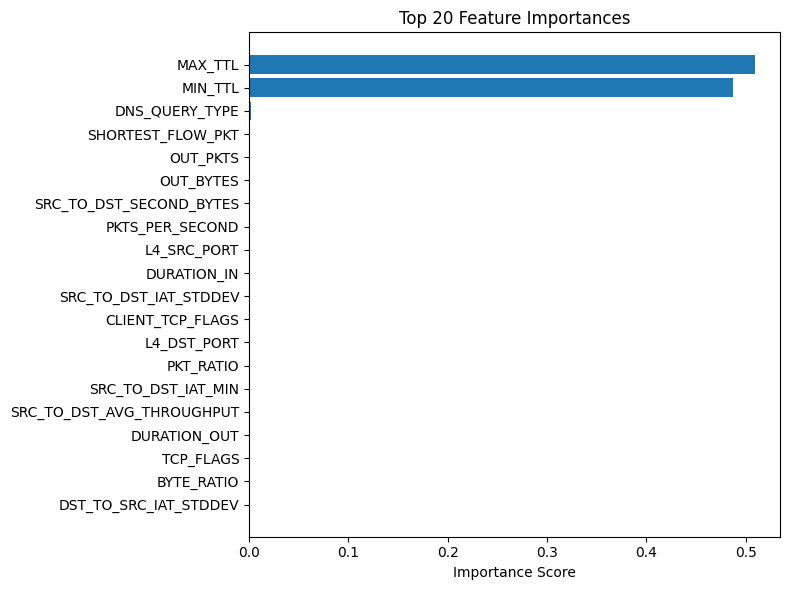

In [109]:
plt.figure(figsize=(8, 6))
plt.barh(
    top_features["feature"][::-1],
    top_features["importance"][::-1]
)
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

In [110]:
corr = X_train.copy()
corr["Label"] = y_train
corr = corr.corr()["Label"].abs().sort_values(ascending=False)

corr.head(15)

Label                        1.000000
MAX_TTL                      0.856745
MIN_TTL                      0.856502
MIN_IP_PKT_LEN               0.395695
DST_TO_SRC_IAT_AVG           0.349948
SHORTEST_FLOW_PKT            0.287537
DST_TO_SRC_IAT_STDDEV        0.261963
SRC_TO_DST_IAT_STDDEV        0.185411
SRC_TO_DST_SECOND_BYTES      0.168203
DST_TO_SRC_AVG_THROUGHPUT    0.162293
PKTS_PER_SECOND              0.159958
L4_DST_PORT                  0.130582
DST_TO_SRC_SECOND_BYTES      0.130414
SRC_TO_DST_AVG_THROUGHPUT    0.125159
PROTOCOL                     0.115637
Name: Label, dtype: float64

In [111]:
!pip install shap

In [112]:
import shap
shap.initjs()

In [113]:
explainer = shap.TreeExplainer(best_model)

In [114]:
X_shap = X_test.sample(1000, random_state=42)
shap_values = explainer.shap_values(X_shap)

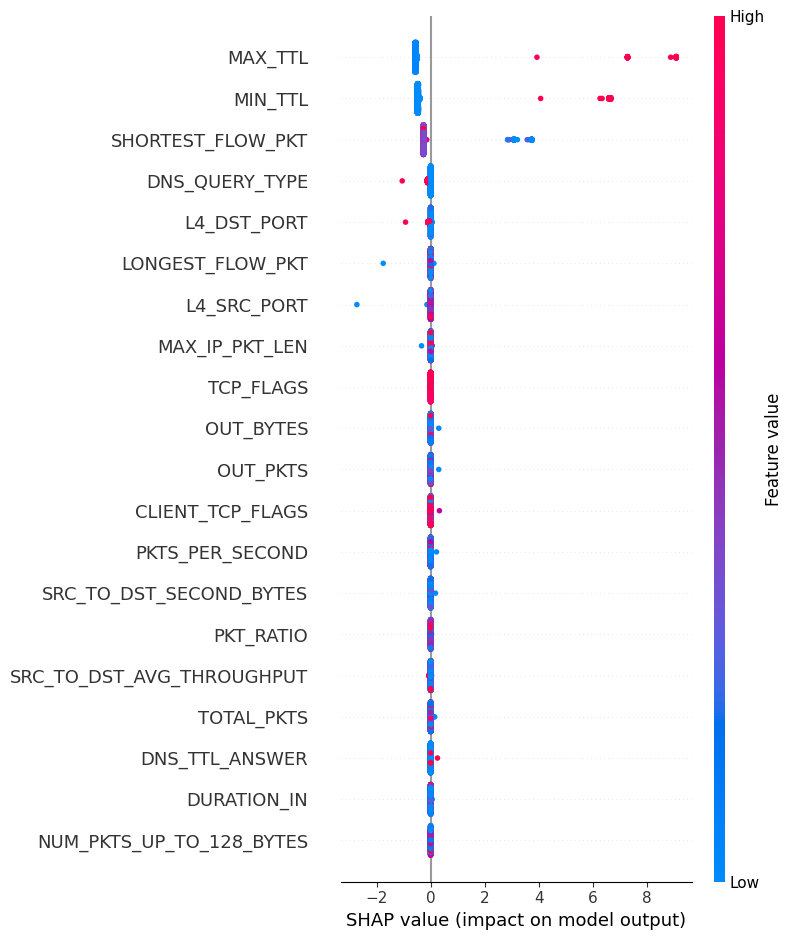

In [115]:
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="dot",
    max_display=20
)

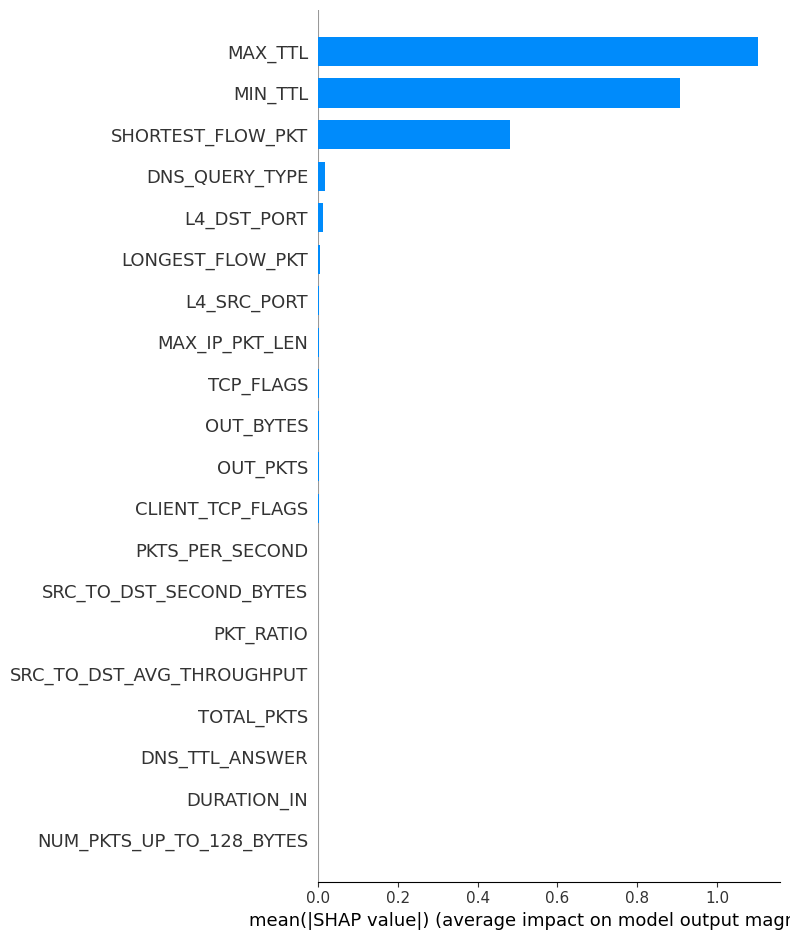

In [116]:
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="bar",
    max_display=20
)

In [117]:
top_features_list = top_features["feature"].head(5).tolist()
top_features_list

['MAX_TTL', 'MIN_TTL', 'DNS_QUERY_TYPE', 'SHORTEST_FLOW_PKT', 'OUT_PKTS']

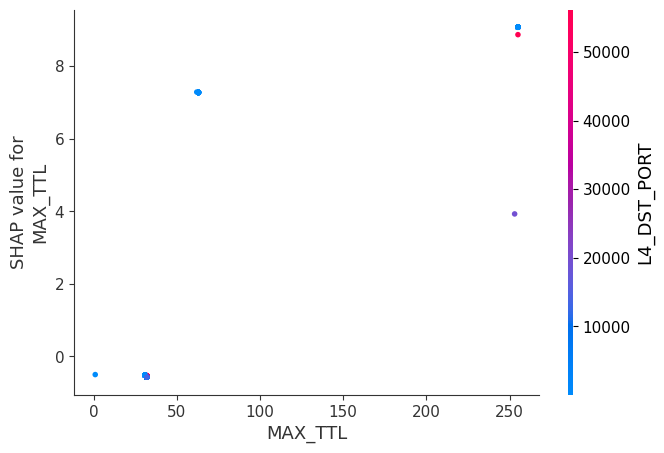

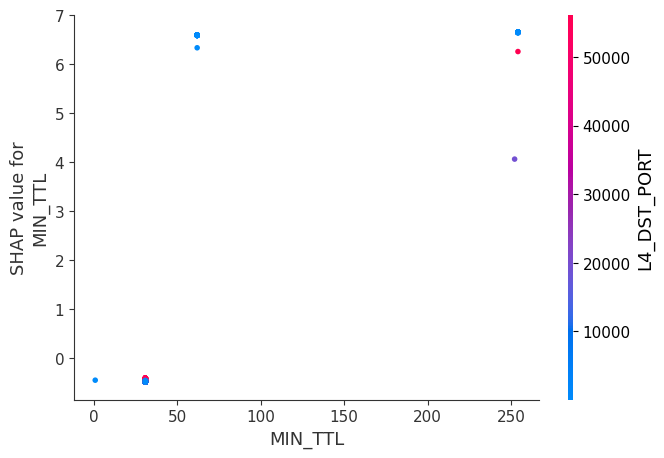

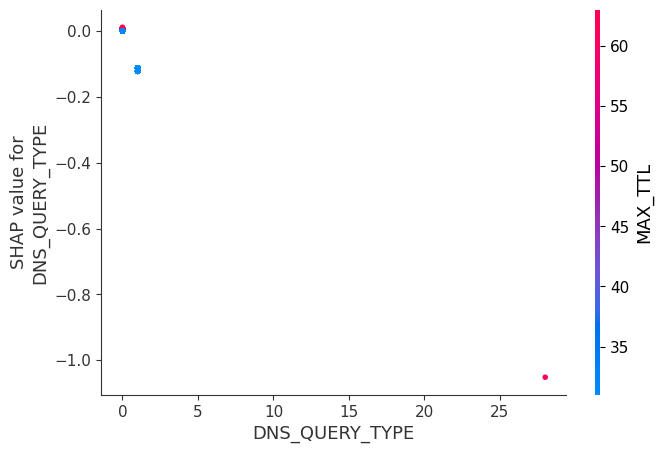

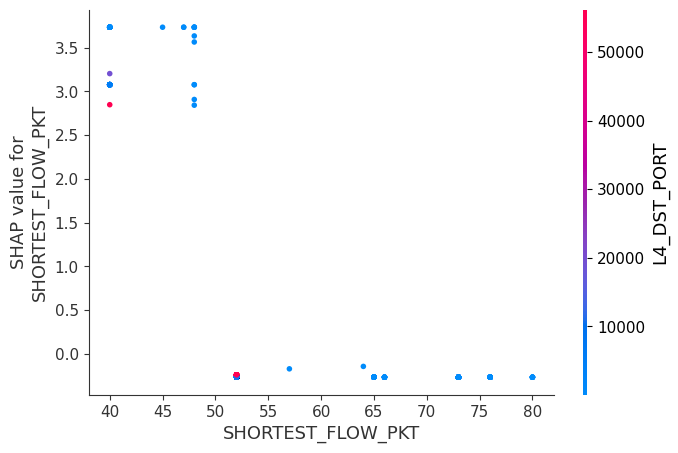

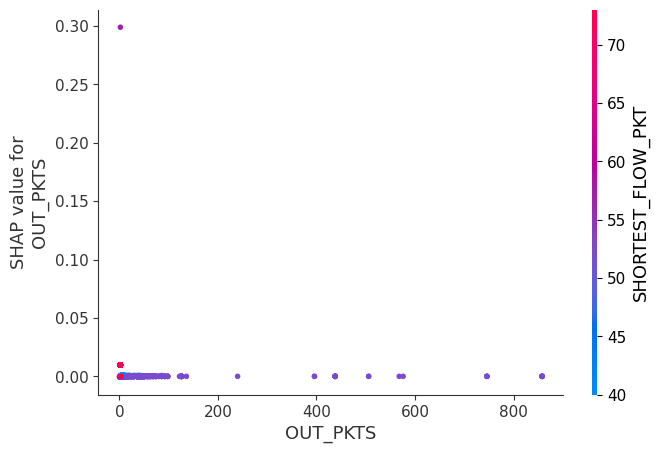

In [118]:
for feat in top_features_list:
    shap.dependence_plot(
        feat,
        shap_values,
        X_shap
    )

# classification

In [119]:
df_pruned['Attack'] = df_copy['Attack']
df_mc = df_pruned.copy()

df_mc['Attack'].value_counts()

Attack
Benign            935055
Exploits           28808
Fuzzers            17683
Reconnaissance      8421
DoS                 3838
Generic             3505
Backdoor            2981
Shellcode           1127
Analysis             892
Worms                101
Name: count, dtype: int64

In [120]:
df_mc.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'SRC_TO_DST_IAT_MIN',
       'SRC_TO_DST_IAT_MAX', 'SRC_TO_DST_IAT_AVG', 'SRC_TO

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_mc['Attack_encoded'] = le.fit_transform(df_mc['Attack'])

In [122]:
attack_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
attack_mapping

{'Analysis': np.int64(0),
 'Backdoor': np.int64(1),
 'Benign': np.int64(2),
 'DoS': np.int64(3),
 'Exploits': np.int64(4),
 'Fuzzers': np.int64(5),
 'Generic': np.int64(6),
 'Reconnaissance': np.int64(7),
 'Shellcode': np.int64(8),
 'Worms': np.int64(9)}

In [123]:
import joblib
joblib.dump(le, "attack_label_encoder.joblib")

['attack_label_encoder.joblib']

In [124]:
df_mc_cleaned = df_mc.dropna(subset=['Attack'])

# Perform feature engineering directly on df_mc_cleaned for the multi-class task
df_mc_cleaned['TOTAL_BYTES'] = df_mc_cleaned['IN_BYTES'] + df_mc_cleaned['OUT_BYTES']
df_mc_cleaned['TOTAL_PKTS'] = df_mc_cleaned['IN_PKTS'] + df_mc_cleaned['OUT_PKTS']
df_mc_cleaned['BYTES_PER_PKT'] = (
    df_mc_cleaned['TOTAL_BYTES'] / (df_mc_cleaned['TOTAL_PKTS'] + 1)
)
df_mc_cleaned['PKTS_PER_SECOND'] = (
    df_mc_cleaned['TOTAL_PKTS'] /
    (df_mc_cleaned['FLOW_DURATION_MILLISECONDS'] / 1000 + 1)
)
df_mc_cleaned['BYTE_RATIO'] = (
    df_mc_cleaned['IN_BYTES'] / (df_mc_cleaned['OUT_BYTES'] + 1)
)
df_mc_cleaned['PKT_RATIO'] = (
    df_mc_cleaned['IN_PKTS'] / (df_mc_cleaned['OUT_PKTS'] + 1)
)
df_mc_cleaned.replace([np.inf, -np.inf], 0, inplace=True)

# Define leakage features and all label-related columns to drop from X
LEAKAGE_FEATURES_MC = [
    'IPV4_SRC_ADDR',
    'IPV4_DST_ADDR',
    'FLOW_START_MILLISECONDS',
    'FLOW_END_MILLISECONDS',
    'Attack' # The original Attack column (string)
]
columns_to_drop = LEAKAGE_FEATURES_MC + ['Attack_encoded', 'Label']

# Create X by dropping specified columns
X = df_mc_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Ensure X is entirely numeric and clean
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
X = X[numeric_cols]
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

y = df_mc_cleaned['Attack_encoded']

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

In [126]:
y_train.value_counts(normalize=True).sort_index()

Attack_encoded
0    0.000889
1    0.002974
2    0.932806
3    0.003829
4    0.028738
5    0.017640
6    0.003496
7    0.008401
8    0.001124
9    0.000101
Name: proportion, dtype: float64

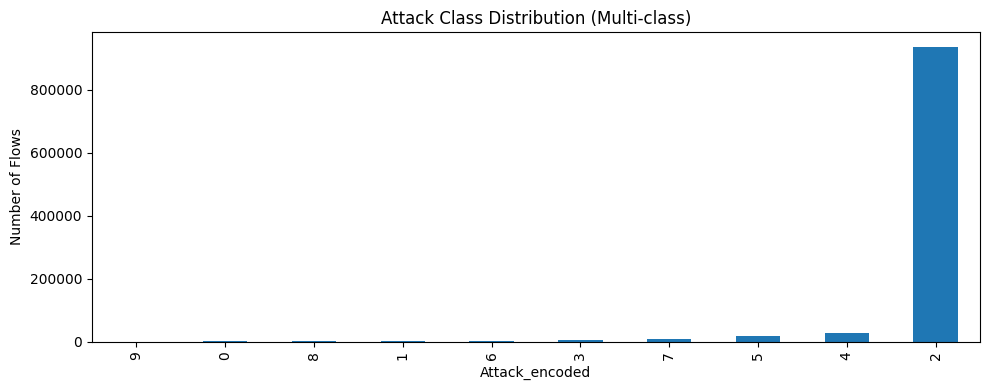

In [127]:
plt.figure(figsize=(10, 4))
y.value_counts().sort_values().plot(kind='bar')
plt.title("Attack Class Distribution (Multi-class)")
plt.ylabel("Number of Flows")
plt.tight_layout()
plt.show()

In [128]:
attack_counts = df_mc['Attack'].value_counts()

attack_percent = (attack_counts / attack_counts.sum()) * 100

attack_dist = pd.DataFrame({
    "Count": attack_counts,
    "Percentage (%)": attack_percent.round(2)
})

attack_dist

Count  Percentage (%)
Attack                                
Benign          935055           93.28
Exploits         28808            2.87
Fuzzers          17683            1.76
Reconnaissance    8421            0.84
DoS               3838            0.38
Generic           3505            0.35
Backdoor          2981            0.30
Shellcode         1127            0.11
Analysis           892            0.09
Worms              101            0.01

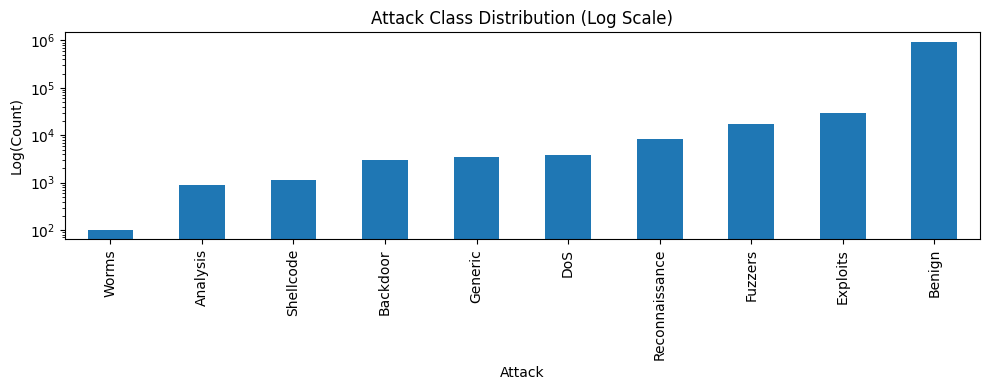

In [129]:
plt.figure(figsize=(10, 4))
attack_counts.sort_values().plot(kind='bar')
plt.yscale('log')
plt.ylabel("Log(Count)")
plt.title("Attack Class Distribution (Log Scale)")
plt.tight_layout()
plt.show()

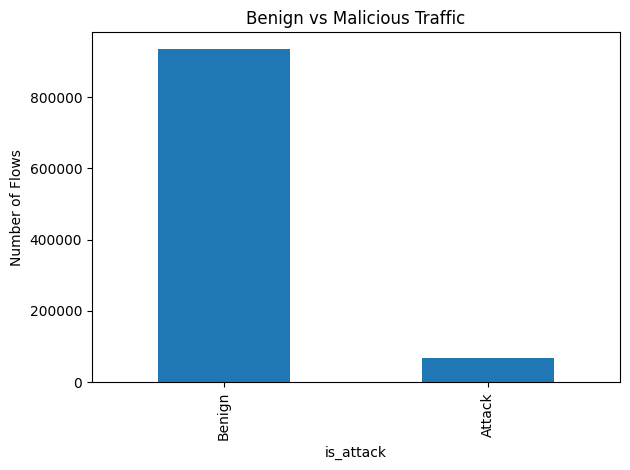

In [130]:
df_mc['is_attack'] = df_mc['Attack'] != 'Benign'

plt.figure()
df_mc['is_attack'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Benign', 'Attack'])
plt.ylabel("Number of Flows")
plt.title("Benign vs Malicious Traffic")
plt.tight_layout()
plt.show()

In [131]:
top_features = [
    'IN_BYTES',
    'OUT_BYTES',
    'FLOW_DURATION_MILLISECONDS',
    'SRC_TO_DST_IAT_AVG',
    'PKTS_PER_SECOND',
    'BYTES_PER_PKT'
]

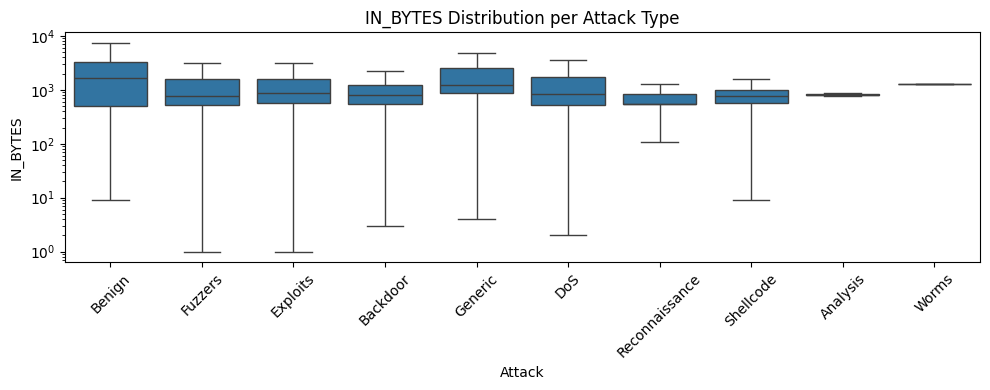

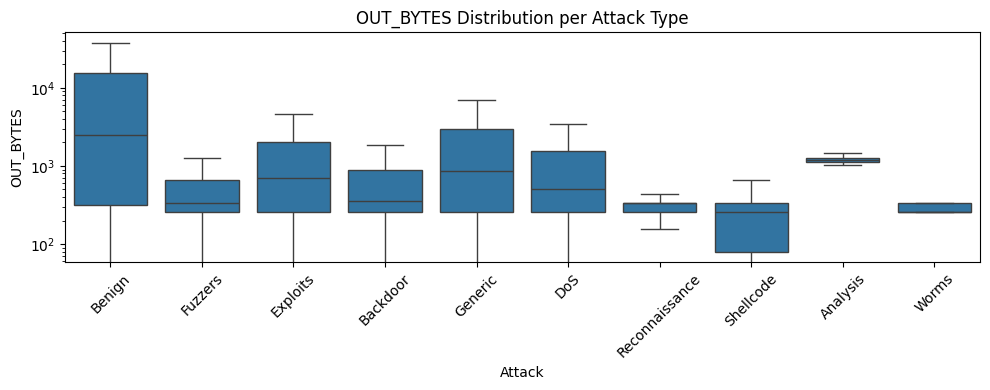

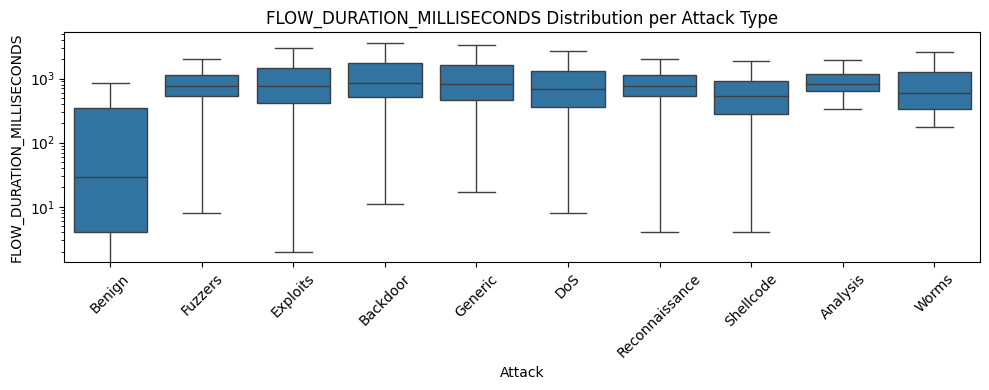

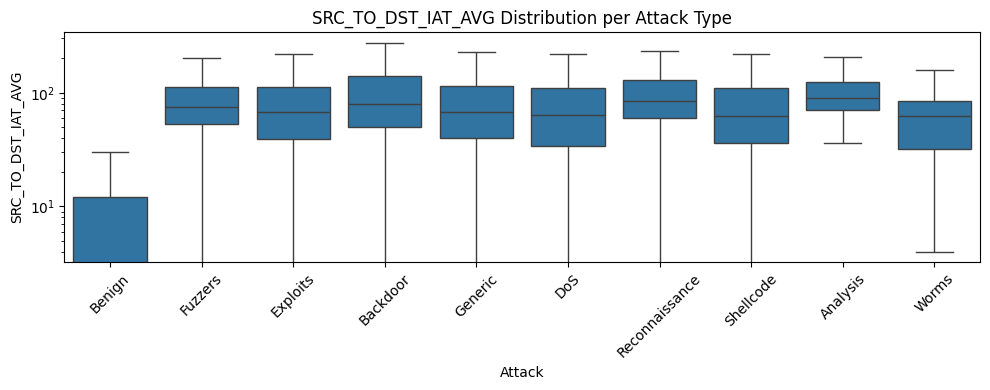

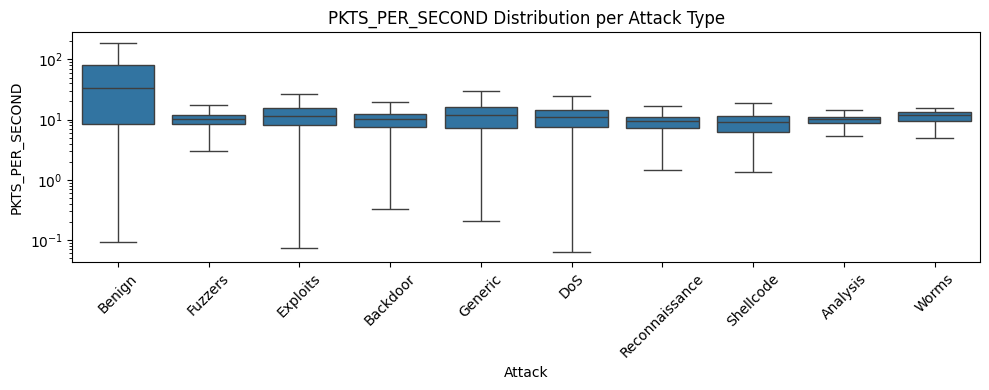

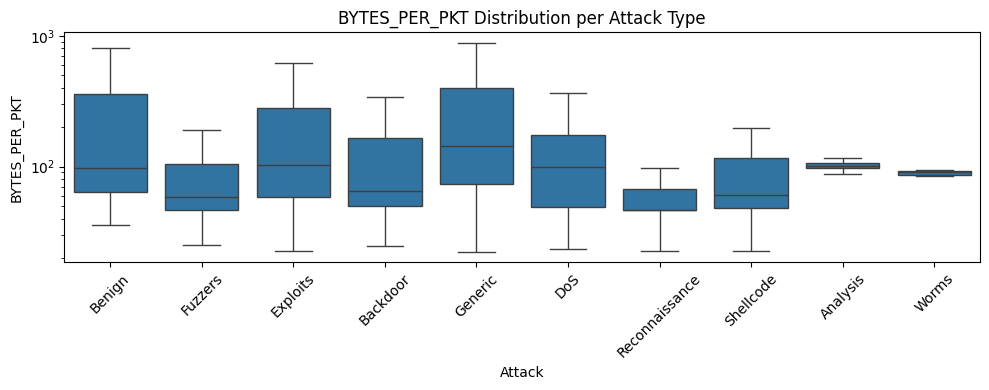

In [132]:
# Add the engineered features from df_fe to df_mc_cleaned
for new_feat in new_features:
    df_mc_cleaned[new_feat] = df_fe[new_feat]

for feat in top_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(
        x='Attack',
        y=feat,
        data=df_mc_cleaned,
        showfliers=False
    )
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.title(f"{feat} Distribution per Attack Type")
    plt.tight_layout()
    plt.show()

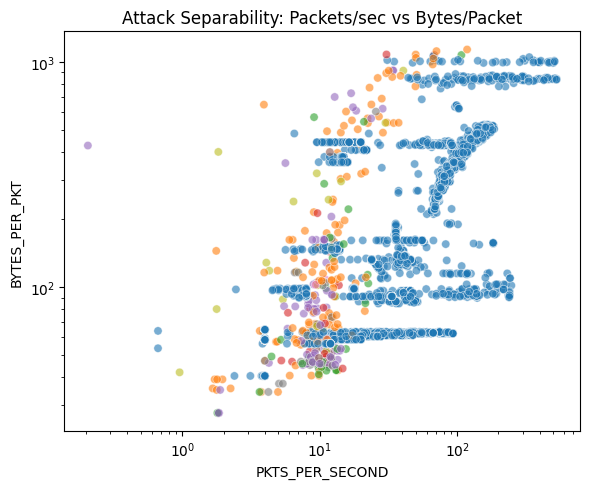

In [133]:
sample_df = df_mc_cleaned.sample(5000, random_state=42)

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=sample_df,
    x='PKTS_PER_SECOND',
    y='BYTES_PER_PKT',
    hue='Attack',
    alpha=0.6,
    legend=False
)
plt.xscale('log')
plt.yscale('log')
plt.title("Attack Separability: Packets/sec vs Bytes/Packet")
plt.tight_layout()
plt.show()

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

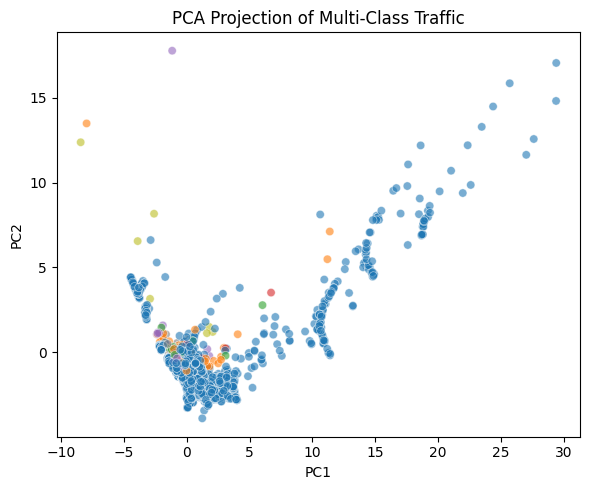

In [135]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Attack'] = df_mc_cleaned['Attack'].values

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=pca_df.sample(5000, random_state=42),
    x='PC1',
    y='PC2',
    hue='Attack',
    alpha=0.6,
    legend=False
)
plt.title("PCA Projection of Multi-Class Traffic")
plt.tight_layout()
plt.show()

In [136]:
X.shape, y.shape

((1002411, 55), (1002411,))

In [137]:
y.nunique(), le.classes_

(10,
 array(['Analysis', 'Backdoor', 'Benign', 'DoS', 'Exploits', 'Fuzzers',
        'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object))

In [138]:
from sklearn.preprocessing import StandardScaler

scaler_mc = StandardScaler()

X_train_scaled = scaler_mc.fit_transform(X_train)
X_val_scaled   = scaler_mc.transform(X_val)
X_test_scaled  = scaler_mc.transform(X_test)

In [139]:
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    X_val_scaled,
    columns=X_val.columns,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

In [140]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))
class_weight_dict

{np.int64(0): np.float64(112.44983974358975),
 np.int64(1): np.float64(33.621801629132726),
 np.int64(2): np.float64(0.10720340148318355),
 np.int64(3): np.float64(26.11414216598437),
 np.int64(4): np.float64(3.4797272501859657),
 np.int64(5): np.float64(5.668823719502343),
 np.int64(6): np.float64(28.605258866693845),
 np.int64(7): np.float64(11.903087362171332),
 np.int64(8): np.float64(88.93371356147021),
 np.int64(9): np.float64(988.2915492957746)}

In [141]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(701687, 55) (150362, 55) (150362, 55)
(701687,) (150362,) (150362,)


In [142]:
y_train.value_counts(normalize=True).sort_index()

Attack_encoded
0    0.000889
1    0.002974
2    0.932806
3    0.003829
4    0.028738
5    0.017640
6    0.003496
7    0.008401
8    0.001124
9    0.000101
Name: proportion, dtype: float64

In [143]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

def evaluate_multiclass(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Macro_F1": f1_score(y_true, y_pred, average='macro'),
        "Weighted_F1": f1_score(y_true, y_pred, average='weighted'),
        "Macro_Precision": precision_score(y_true, y_pred, average='macro'),
        "Macro_Recall": recall_score(y_true, y_pred, average='macro')
    }

In [144]:
from sklearn.linear_model import LogisticRegression

lr_mc = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight=class_weight_dict,
    n_jobs=-1
)

lr_mc.fit(X_train_scaled, y_train)

y_val_pred_lr = lr_mc.predict(X_val_scaled)

results_lr = evaluate_multiclass(y_val, y_val_pred_lr)
results_lr

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'Accuracy': 0.962703342599859,
 'Macro_F1': 0.3708814708211585,
 'Weighted_F1': 0.9651573860362554,
 'Macro_Precision': 0.3687433013521829,
 'Macro_Recall': 0.5713693066941218}

In [145]:
from sklearn.ensemble import RandomForestClassifier

rf_mc = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    class_weight=class_weight_dict,
    n_jobs=-1,
    random_state=42
)

rf_mc.fit(X_train, y_train)

y_val_pred_rf = rf_mc.predict(X_val)

results_rf = evaluate_multiclass(y_val, y_val_pred_rf)
results_rf

{'Accuracy': 0.9810856466394435,
 'Macro_F1': 0.6382014876032004,
 'Weighted_F1': 0.9804918154310995,
 'Macro_Precision': 0.6557301844900358,
 'Macro_Recall': 0.6461553221111288}

In [146]:
!pip install xgboost

In [147]:
from xgboost import XGBClassifier

xgb_mc = XGBClassifier(
    objective='multi:softprob',
    num_class=10,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    eval_metric='mlogloss',
    random_state=42
)

xgb_mc.fit(X_train, y_train)

y_val_pred_xgb = xgb_mc.predict(X_val)

results_xgb = evaluate_multiclass(y_val, y_val_pred_xgb)
results_xgb

{'Accuracy': 0.9816509490429762,
 'Macro_F1': 0.606999146769983,
 'Weighted_F1': 0.9801206466908368,
 'Macro_Precision': 0.7146010382743391,
 'Macro_Recall': 0.578169484726188}

In [148]:
!pip install lightgbm

In [149]:
import lightgbm as lgb

lgbm_mc = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=10,
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    class_weight=class_weight_dict,
    random_state=42
)

lgbm_mc.fit(X_train, y_train)

y_val_pred_lgbm = lgbm_mc.predict(X_val)

results_lgbm = evaluate_multiclass(y_val, y_val_pred_lgbm)
results_lgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.303231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9490
[LightGBM] [Info] Number of data points in the train set: 701687, number of used features: 55
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

{'Accuracy': 0.36708742900466873,
 'Macro_F1': 0.1225479052591369,
 'Weighted_F1': 0.5122532438327351,
 'Macro_Precision': 0.1429591980856872,
 'Macro_Recall': 0.307340714079689}

In [150]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.9 MB/s eta 0:00:00


In [151]:
from catboost import CatBoostClassifier

cat_mc = CatBoostClassifier(
    loss_function='MultiClass',
    iterations=300,
    learning_rate=0.1,
    depth=8,
    class_weights=class_weight_dict,
    verbose=False,
    random_seed=42
)

cat_mc.fit(X_train, y_train)

y_val_pred_cat = cat_mc.predict(X_val).astype(int)

results_cat = evaluate_multiclass(y_val, y_val_pred_cat)
results_cat

{'Accuracy': 0.9747742115694125,
 'Macro_F1': 0.5714327707069972,
 'Weighted_F1': 0.9760358803153069,
 'Macro_Precision': 0.5261984118644969,
 'Macro_Recall': 0.7133026378389857}

In [152]:
results_df = pd.DataFrame({
    "LogisticRegression": results_lr,
    "RandomForest": results_rf,
    "XGBoost": results_xgb,
    "LightGBM": results_lgbm,
    "CatBoost": results_cat
}).T

results_df

Accuracy  Macro_F1  Weighted_F1  Macro_Precision  \
LogisticRegression  0.962703  0.370881     0.965157         0.368743   
RandomForest        0.981086  0.638201     0.980492         0.655730   
XGBoost             0.981651  0.606999     0.980121         0.714601   
LightGBM            0.367087  0.122548     0.512253         0.142959   
CatBoost            0.974774  0.571433     0.976036         0.526198   

                    Macro_Recall  
LogisticRegression      0.571369  
RandomForest            0.646155  
XGBoost                 0.578169  
LightGBM                0.307341  
CatBoost                0.713303

In [153]:
best_mc_model = xgb_mc
best_mc_model_name = "XGBoost"

In [154]:
y_test_pred = best_mc_model.predict(X_test)

In [155]:
y_test_prob = best_mc_model.predict_proba(X_test)

In [156]:
test_results_mc = evaluate_multiclass(y_test, y_test_pred)
test_results_mc

{'Accuracy': 0.9814780330136603,
 'Macro_F1': 0.5992452547111701,
 'Weighted_F1': 0.9800162596180569,
 'Macro_Precision': 0.7261829958225928,
 'Macro_Recall': 0.5580657445520438}

In [157]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_test_pred,
    target_names=le.classes_,
    digits=4
))

                precision    recall  f1-score   support

      Analysis     0.3500    0.3134    0.3307       134
      Backdoor     0.7363    0.1499    0.2491       447
        Benign     1.0000    1.0000    1.0000    140259
           DoS     0.6971    0.2122    0.3253       575
      Exploits     0.7774    0.8080    0.7924      4322
       Fuzzers     0.6567    0.9370    0.7722      2652
       Generic     0.8225    0.5285    0.6435       526
Reconnaissance     0.7677    0.5835    0.6631      1263
     Shellcode     0.6541    0.5148    0.5762       169
         Worms     0.8000    0.5333    0.6400        15

      accuracy                         0.9815    150362
     macro avg     0.7262    0.5581    0.5992    150362
  weighted avg     0.9820    0.9815    0.9800    150362



In [158]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

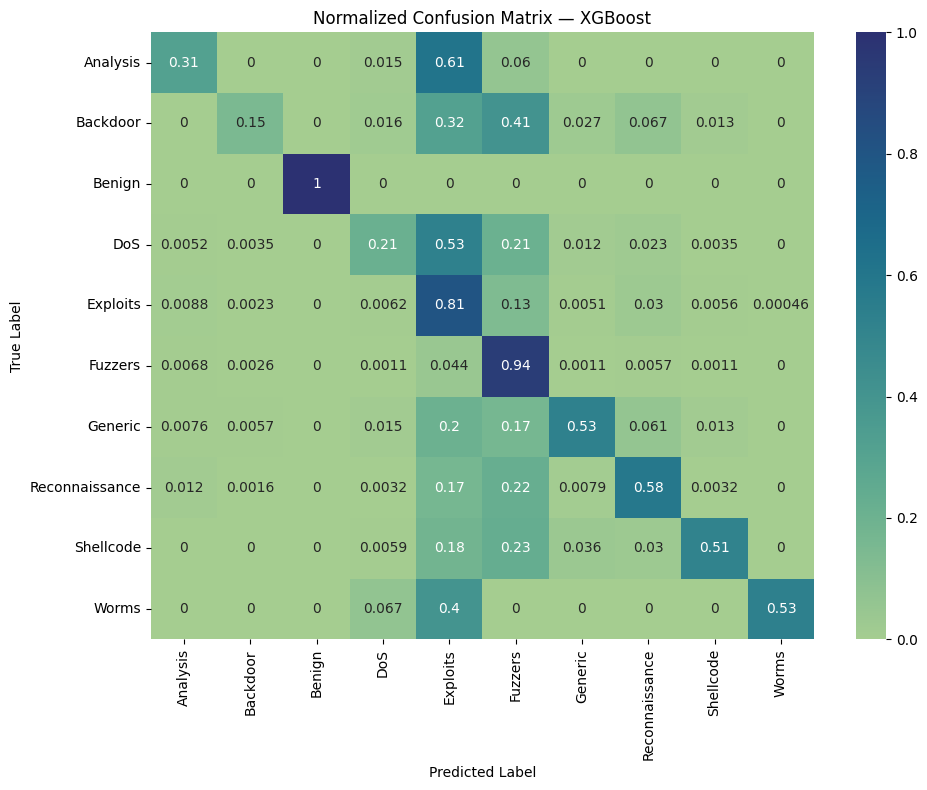

In [159]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_norm,
    annot=True,
    cmap="crest",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Normalized Confusion Matrix — {best_mc_model_name}")
plt.tight_layout()
plt.show()

In [160]:
from sklearn.metrics import recall_score

per_class_recall = recall_score(
    y_test,
    y_test_pred,
    average=None
)

recall_df = pd.DataFrame({
    "Attack": le.classes_,
    "Recall": per_class_recall
}).sort_values(by="Recall")

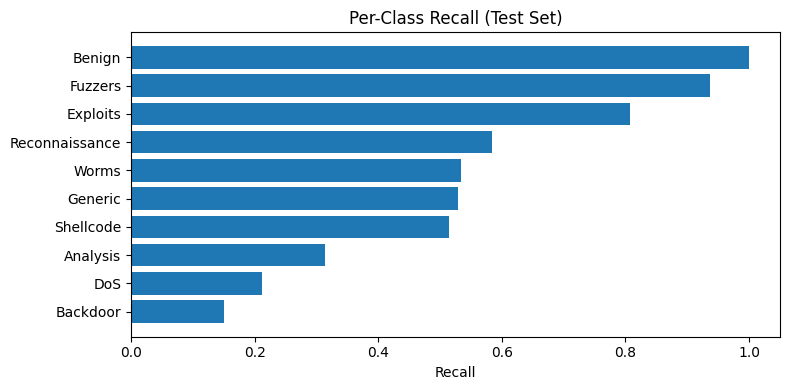

In [161]:
plt.figure(figsize=(8, 4))
plt.barh(recall_df["Attack"], recall_df["Recall"])
plt.xlabel("Recall")
plt.title("Per-Class Recall (Test Set)")
plt.tight_layout()
plt.show()

In [162]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [163]:
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

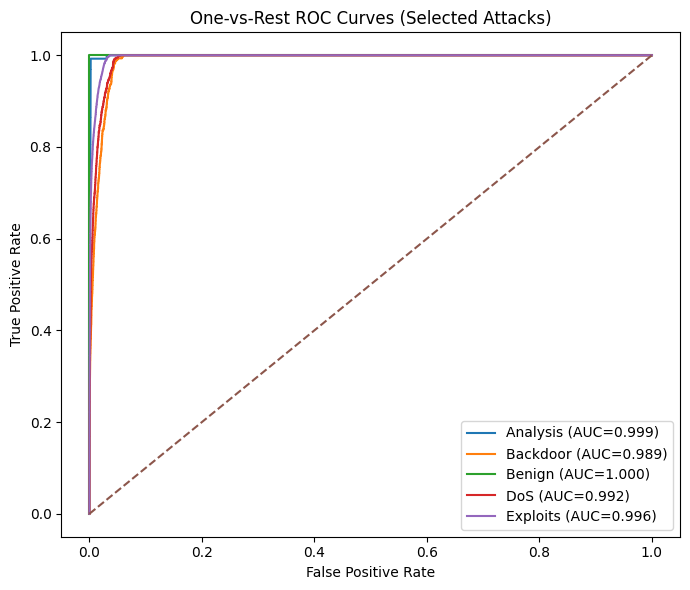

In [164]:
plt.figure(figsize=(7, 6))

for i, attack in enumerate(le.classes_[:5]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{attack} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves (Selected Attacks)")
plt.legend()
plt.tight_layout()
plt.show()

In [165]:
error_df = pd.DataFrame({
    "True": le.inverse_transform(y_test),
    "Pred": le.inverse_transform(y_test_pred)
})

confusions = (
    error_df[error_df["True"] != error_df["Pred"]]
    .value_counts()
    .head(10)
)

confusions

True            Pred          
Exploits        Fuzzers           579
DoS             Exploits          305
Reconnaissance  Fuzzers           282
                Exploits          209
Backdoor        Fuzzers           183
                Exploits          142
Exploits        Reconnaissance    128
DoS             Fuzzers           121
Fuzzers         Exploits          118
Generic         Exploits          107
Name: count, dtype: int64